In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import scipy
import time
from matplotlib import cm, colors

In [2]:
#definiramo gausa
def gaus(x,mu,sig):
    return 1/(sig * np.sqrt(2*np.pi)) * np.exp( -1/2 * ((x-mu)/sig)**2)


# x = np.linspace(-10,10,1000)
# y = gaus(x, -1, 2)
# plt.plot(x,y)

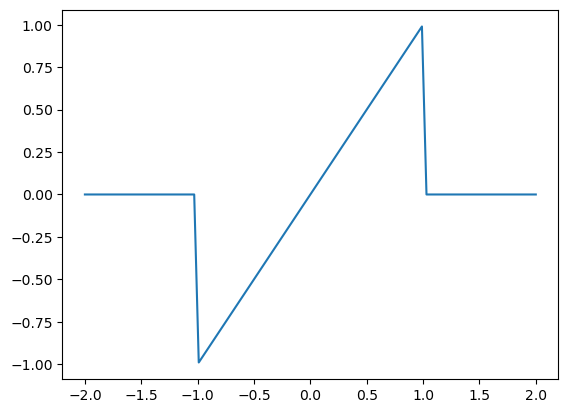

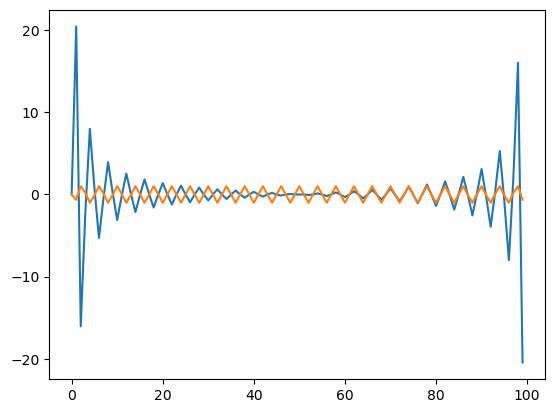

In [3]:
N= 100
x = np.linspace(-2,2,N)
y = np.zeros(N)
plt.figure()
y[abs(x) < 1] = x[abs(x) < 1]
plt.plot(x,y)

# y = np.cos(2*0.1 *x)


c = np.zeros(N,complex)
n = np.arange(N)
for k in range(N):
    c[k] = np.sum(y*np.exp(-2j * np.pi * k * n/N))
plt.figure()
plt.plot(np.imag(c))
plt.plot(np.real(c))

In [4]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1)) # in essence row->column transformation, k*n is then the dot product..
    #print("Vector",k)
    #print("Matrix",k*n)
    M = np.exp(-2j * np.pi * k * n / N)
    # print("Matrix",M)
    # plt.imshow(abs(M))
    return np.dot(M, x)

#kaj nrdi reshape:
x1 =np.arange(10)
x2 = x1.reshape((10,1)) + 1
print(x2)
print(x2 * x1) 
print(x1 * x2) #oboje je vrstica krat faktor -> vrstico zmnozis z vsakim faktorjem
#-> tako dobis M, če M skalarno zmnožiš z x dobis vsoto po k_i * n za vsak k_i iz k

def DFT_simplest(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    F=[]
    for k in range(N):
            fk=0.
            for n in range(N):
                Mkn=np.exp(-2j * np.pi * k * n / N)
                fk += Mkn*x[n]
            F.append(fk)
            #print("k,F[k]",k,fk)
    return np.asarray(F)

def DFT(y,roll=False):
    N = np.shape(y)[0]
    # delta = len(y)/N
    c = np.zeros(np.shape(y), complex)
    n = np.arange(N)
    for k in range(N):
        c[k] = np.sum(y * np.exp(-1j * 2 * np.pi * k * n/N))  # ker tle ni  *delta -> na koncu delis z N
    if roll == True:
        return np.roll(c,N//2)
    return c

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]]


In [5]:
print(abs(1+1j))

1.4142135623730951


In [6]:
#priprava vzorca:

def vzorec_prep(T,N):
    #pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
    dt = T/N
    nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
    nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
    t = np.arange(0,T, dt)
    nu_min = 1/dt
    return t, nus, nu_c, nu_min, dt


kritična:  25.0
min:  50.0
0.2 0.1
0.04


<Figure size 640x480 with 0 Axes>

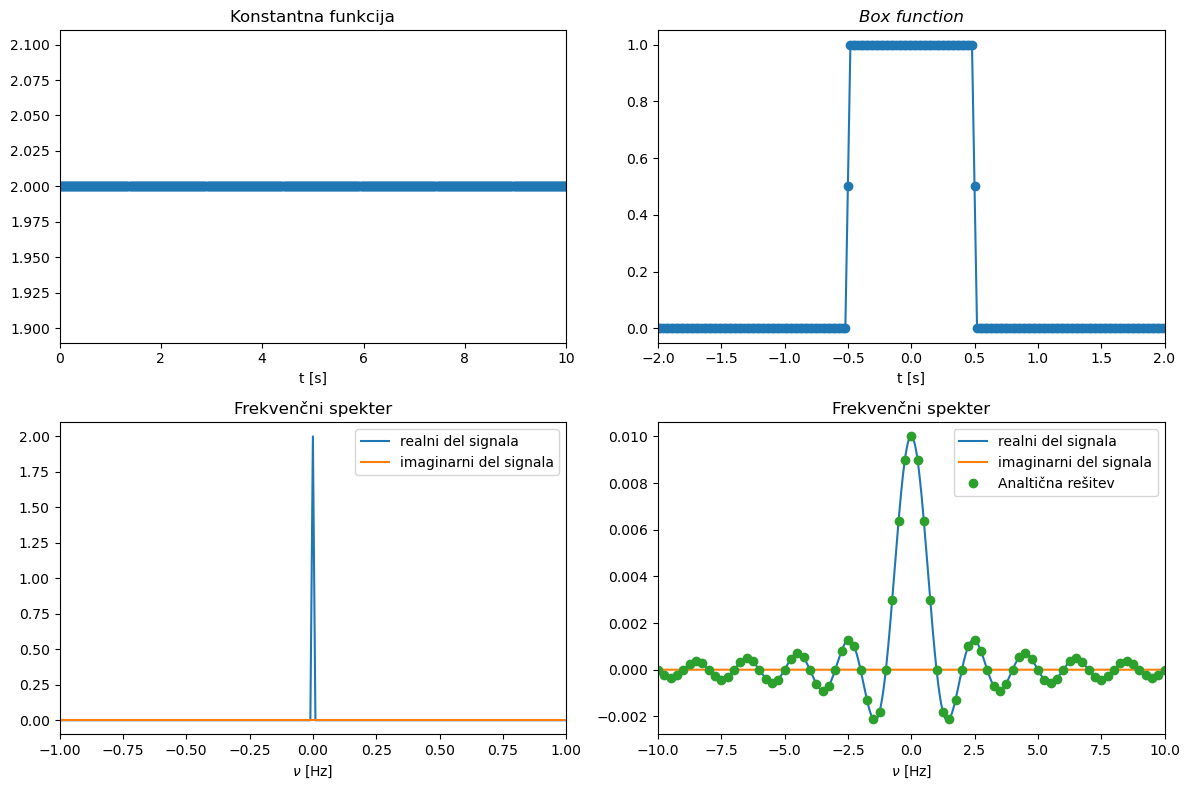

In [99]:
#nekaj osnovnih primerov:
T = 100
N = 5000
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
print("kritična: ",nu_c)
print("min: ",nu_min)
#frekvenci, ki dasta celo periodo
# f1 = (2*T)/T
# f2 = 100/T
t01 = 5
t02 = 10
f1 = 1/t01
f2 = 1/t02
print(f1,f2)

y1 = np.ones(np.shape(t)) * 2

x= t - T//2
y2 = np.zeros(N)
plt.figure()
# y2[abs(x) < T//4] = x[abs(x) < T//4]
y2[abs(x) < 0.5] = 1
y2[abs(x) == 0.5] = 1/2
# print(x[(abs(x) < 0.5)])
y2_r = np.roll(y2, N//2)


dft1 = 1/N * DFT(y1, roll=True)
dft2 = 1/N * DFT(y2_r, roll=True)

sqr1 = abs(dft1)**2
sqr2 = abs(dft2)**2

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 1 column of subplots

axes[(0,0)].plot(t,y1, marker='o')
axes[(0,0)].set_xlim(0,10)

axes[(0,1)].plot(x,y2, marker='o')

axes[(1,0)].plot(nus,np.real(dft1), label='realni del signala')
axes[(1,0)].plot(nus,np.imag(dft1), label='imaginarni del signala')
axes[(1,1)].plot(nus,np.real(dft2), label='realni del signala')
axes[(1,1)].plot(nus,np.imag(dft2), label='imaginarni del signala')
axes[(1,1)].plot(nus[::25], 1/T *  np.sinc(nus)[::25], label='Analtična rešitev', marker='o', linestyle='')


axes[(1,0)].set_xlim(-1,1)
axes[(1,1)].set_xlim(-10,10)
axes[(0,1)].set_xlim(-2,2)
axes[(0,0)].set_title("Konstantna funkcija")
axes[(0,1)].set_title("Box function", style='italic')
axes[(1,0)].set_title("Frekvenčni spekter")
axes[(1,1)].set_title("Frekvenčni spekter")
axes[(1,0)].legend()
axes[(1,1)].legend()
axes[(1,0)].set_xlabel(r"$\nu$ [Hz]")
axes[(1,1)].set_xlabel(r"$\nu$ [Hz]")
axes[(0,0)].set_xlabel(r"t [s]")
axes[(0,1)].set_xlabel(r"t [s]")
print(2*dt)
# axes[(2,0)].plot(nus, sqr1, label='|DFT|')
# axes[(2,1)].plot(nus, sqr2, label='|DFT|')

plt.tight_layout()
plt.savefig('box_in_konst')

kritična:  2.5
min:  5.0
0.2 0.1


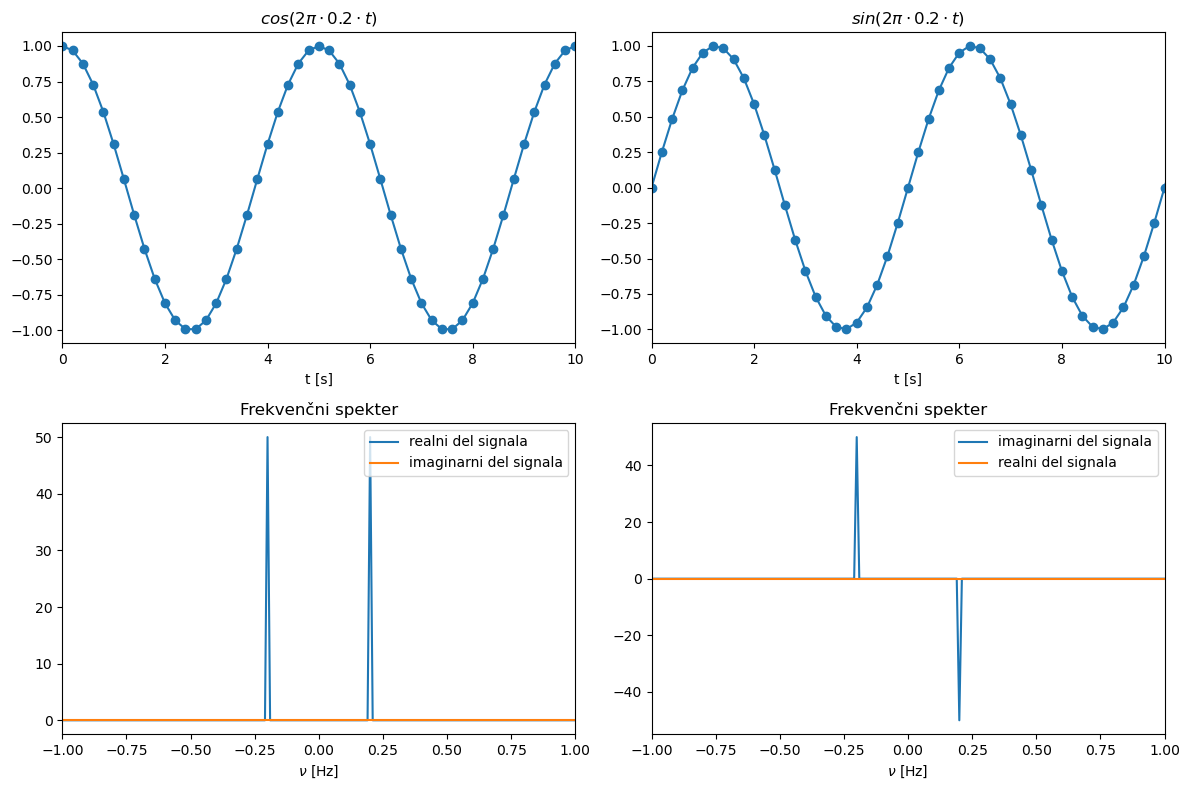

In [9]:
#nekaj osnovnih primerov:
T = 100
N = 500
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
print("kritična: ",nu_c)
print("min: ",nu_min)
#frekvenci, ki dasta celo periodo
# f1 = (2*T)/T
# f2 = 100/T
t01 = 5
t02 = 10
f1 = 1/t01
f2 = 1/t02
print(f1,f2)

y1 = np.cos(2*np.pi * f1 * t)
y2 = np.sin(2*np.pi * f1 * t)

dft1 = dt * DFT(y1, roll=True)
dft2 = dt * DFT(y2, roll=True)

sqr1 = abs(dft1)**2
sqr2 = abs(dft2)**2

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 1 column of subplots

axes[(0,0)].plot(t,y1, marker='o')
axes[(0,0)].set_xlim(0,10)

axes[(0,1)].plot(t,y2, marker='o')
axes[(0,1)].set_xlim(0,10)
axes[(1,0)].set_xlim(-1,1)
axes[(1,1)].set_xlim(-1,1)

axes[(1,0)].plot(nus,np.real(dft1), label='realni del signala')
axes[(1,1)].plot(nus,np.imag(dft2), label='imaginarni del signala')

axes[(1,0)].plot(nus,np.imag(dft1), label='imaginarni del signala')
axes[(1,1)].plot(nus,np.real(dft2), label='realni del signala')
axes[(0,0)].set_title(r"$cos(2 \pi \cdot 0.2 \cdot t)$")
axes[(0,1)].set_title(r"$sin(2 \pi \cdot 0.2 \cdot t)$")
axes[(1,0)].set_title("Frekvenčni spekter")
axes[(1,1)].set_title("Frekvenčni spekter")
axes[(1,0)].legend(loc='upper right')
axes[(1,1)].legend()

axes[(1,0)].set_xlabel(r"$\nu$ [Hz]")
axes[(1,1)].set_xlabel(r"$\nu$ [Hz]")
axes[(0,0)].set_xlabel(r"t [s]")
axes[(0,1)].set_xlabel(r"t [s]")
# axes[(2,0)].plot(nus, sqr1, label='|DFT|')
# axes[(2,1)].plot(nus, sqr2, label='|DFT|')

plt.tight_layout()
plt.savefig("kos_in_sin")


kritična:  2.5
min:  5.0
kritična:  25.0
min:  50.0
0.2 0.1 20.0


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_1944/1337362122.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


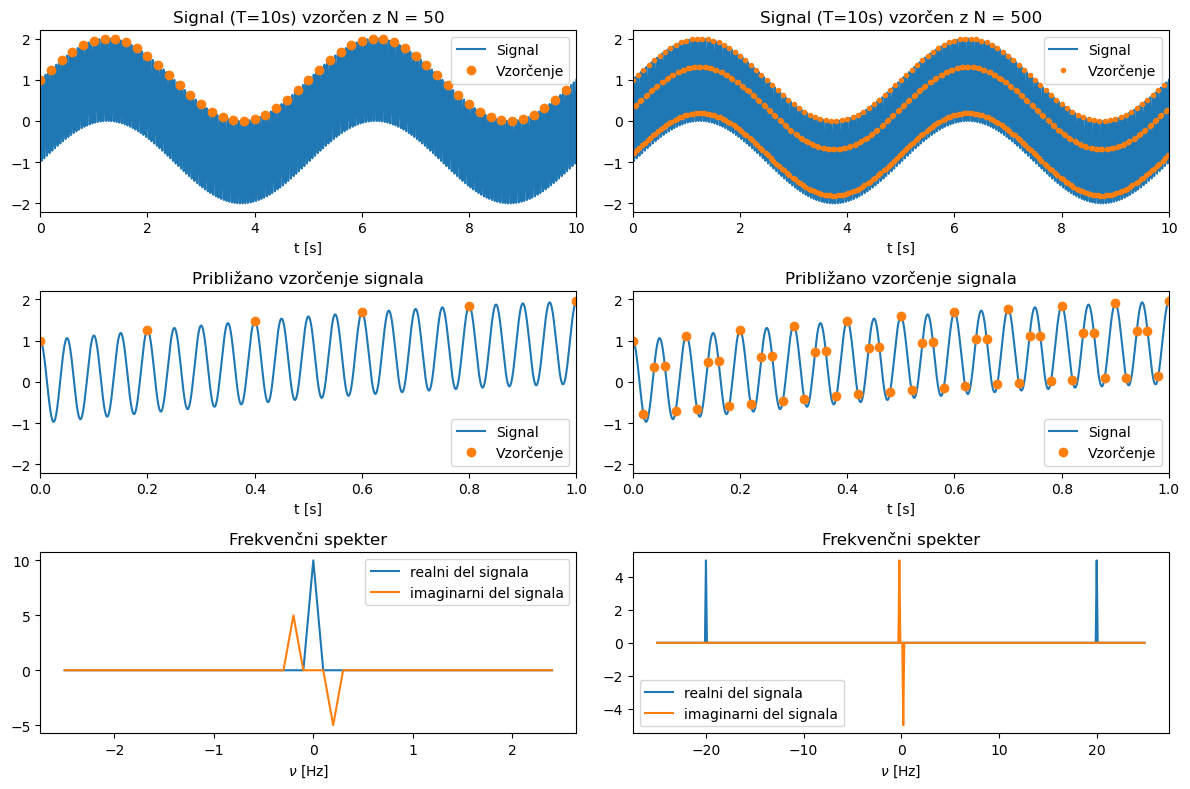

In [156]:
#mix cos in sin


T1 = 10
N1 = 50
t1,nus1, nu_c1, nu_min1, dt1 = vzorec_prep(T1, N1)
print("kritična: ",nu_c1)
print("min: ",nu_min1)

T2 = 10
N2 = 500
t2,nus2, nu_c2, nu_min2, dt2 = vzorec_prep(T2, N2)
print("kritična: ",nu_c2)
print("min: ",nu_min2)
#frekvenci, ki dasta celo periodo
# f1 = (2*T)/T
# f2 = 100/T
t01 = 5
t02 = 10
t03 = 0.05
f1 = 1/t01
f2 = 1/t02
f3 = 1/t03
print(f1,f2,f3)

#šum:
seed = 10
a = 0
noise1 = (np.random.random(len(t1))) * (2 * a) - a
noise2 = (np.random.random(len(t2))) * (2 * a) - a
# print(noise * 3)

y1 =  np.sin(2*np.pi * 1/t01 * t1) + np.cos(2*np.pi * 1/t02 * t1) + np.cos(2*np.pi * 1/t03 * t1) + noise1 * 5
y1 =  np.sin(2*np.pi * 1/t01 * t1) + np.cos(2*np.pi * 1/t03 * t1) + noise1 * 5
y2 =  np.sin(2*np.pi * 1/t01 * t2) + np.cos(2*np.pi * 1/t02 * t2) + np.cos(2*np.pi * 1/t03 * t2) + noise2 * 5
y2 =  np.sin(2*np.pi * 1/t01 * t2) + np.cos(2*np.pi * 1/t03 * t2) + noise2 * 5

t = np.linspace(0,T,1000000)
noise = (np.random.random(len(t))) * (2 * a) - a
y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5
y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

dft1 = dt1 * DFT(y1, roll=True)
dft2 = dt2 * DFT(y2, roll=True)

sqr1 = abs(dft1)**2
sqr2 = abs(dft2)**2

fig, axes = plt.subplots(3, 2, figsize=(12, 8))  # 2 rows, 1 column of subplots

axes[(0,0)].plot(t,y, linestyle='-', marker='',label='Signal')
axes[(0,0)].plot(t1,y1, linestyle='', marker='o',label='Vzorčenje')
axes[(0,0)].set_xlim(0,10)
axes[(1,0)].plot(t,y, linestyle='-', marker='',label='Signal')
axes[(1,0)].plot(t1,y1, linestyle='', marker='o',label='Vzorčenje')
axes[(1,0)].set_xlim(0,1)

axes[(0,1)].plot(t,y, linestyle='-', marker='',label='Signal')
axes[(0,1)].plot(t2,y2, linestyle='', marker='.',label='Vzorčenje')
axes[(0,1)].set_xlim(0,10)
axes[(1,1)].plot(t,y, linestyle='-', marker='',label='Signal')
axes[(1,1)].plot(t2,y2, linestyle='', marker='o',label='Vzorčenje')
axes[(1,1)].set_xlim(0,1)

axes[(2,0)].plot(nus1,np.real(dft1), label='realni del signala')
axes[(2,1)].plot(nus2,np.real(dft2), label='realni del signala')
axes[(2,1)].plot(nus2,np.imag(dft2), label='imaginarni del signala')

axes[(2,0)].plot(nus1,np.imag(dft1), label='imaginarni del signala')
axes[(0,0)].set_title("Signal (T=10s) vzorčen z N = 50")
axes[(0,1)].set_title("Signal (T=10s) vzorčen z N = 500")
axes[(1,0)].set_title("Približano vzorčenje signala")
axes[(1,1)].set_title("Približano vzorčenje signala")
axes[(2,0)].set_title("Frekvenčni spekter")
axes[(2,1)].set_title("Frekvenčni spekter")
axes[(2,0)].set_xlabel(r"$\nu$ [Hz]")
axes[(2,1)].set_xlabel(r"$\nu$ [Hz]")
axes[(1,0)].set_xlabel(r"t [s]")
axes[(1,1)].set_xlabel(r"t [s]")
axes[(0,0)].set_xlabel(r"t [s]")
axes[(0,1)].set_xlabel(r"t [s]")

axes[(0,0)].legend()
axes[(0,1)].legend()
axes[(1,1)].legend()
axes[(1,0)].legend()
axes[(2,0)].legend()
axes[(2,1)].legend()
plt.tight_layout()


# plt.figure(figsize=(12,8))
# plt.subplot(3,1,1)
# plt.plot(t,y)
# plt.subplot(3,1,2)
# plt.plot(t,y)
# plt.xlim(0,10)

# plt.subplot(3,1,3)
# plt.plot(t,y)
# plt.xlim(0,1)
# axes[(2,0)].plot(nus, sqr1, label='|DFT|')
# axes[(2,1)].plot(nus, sqr2, label='|DFT|')

plt.tight_layout()
plt.savefig('potujitev')

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_70699/1983510105.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


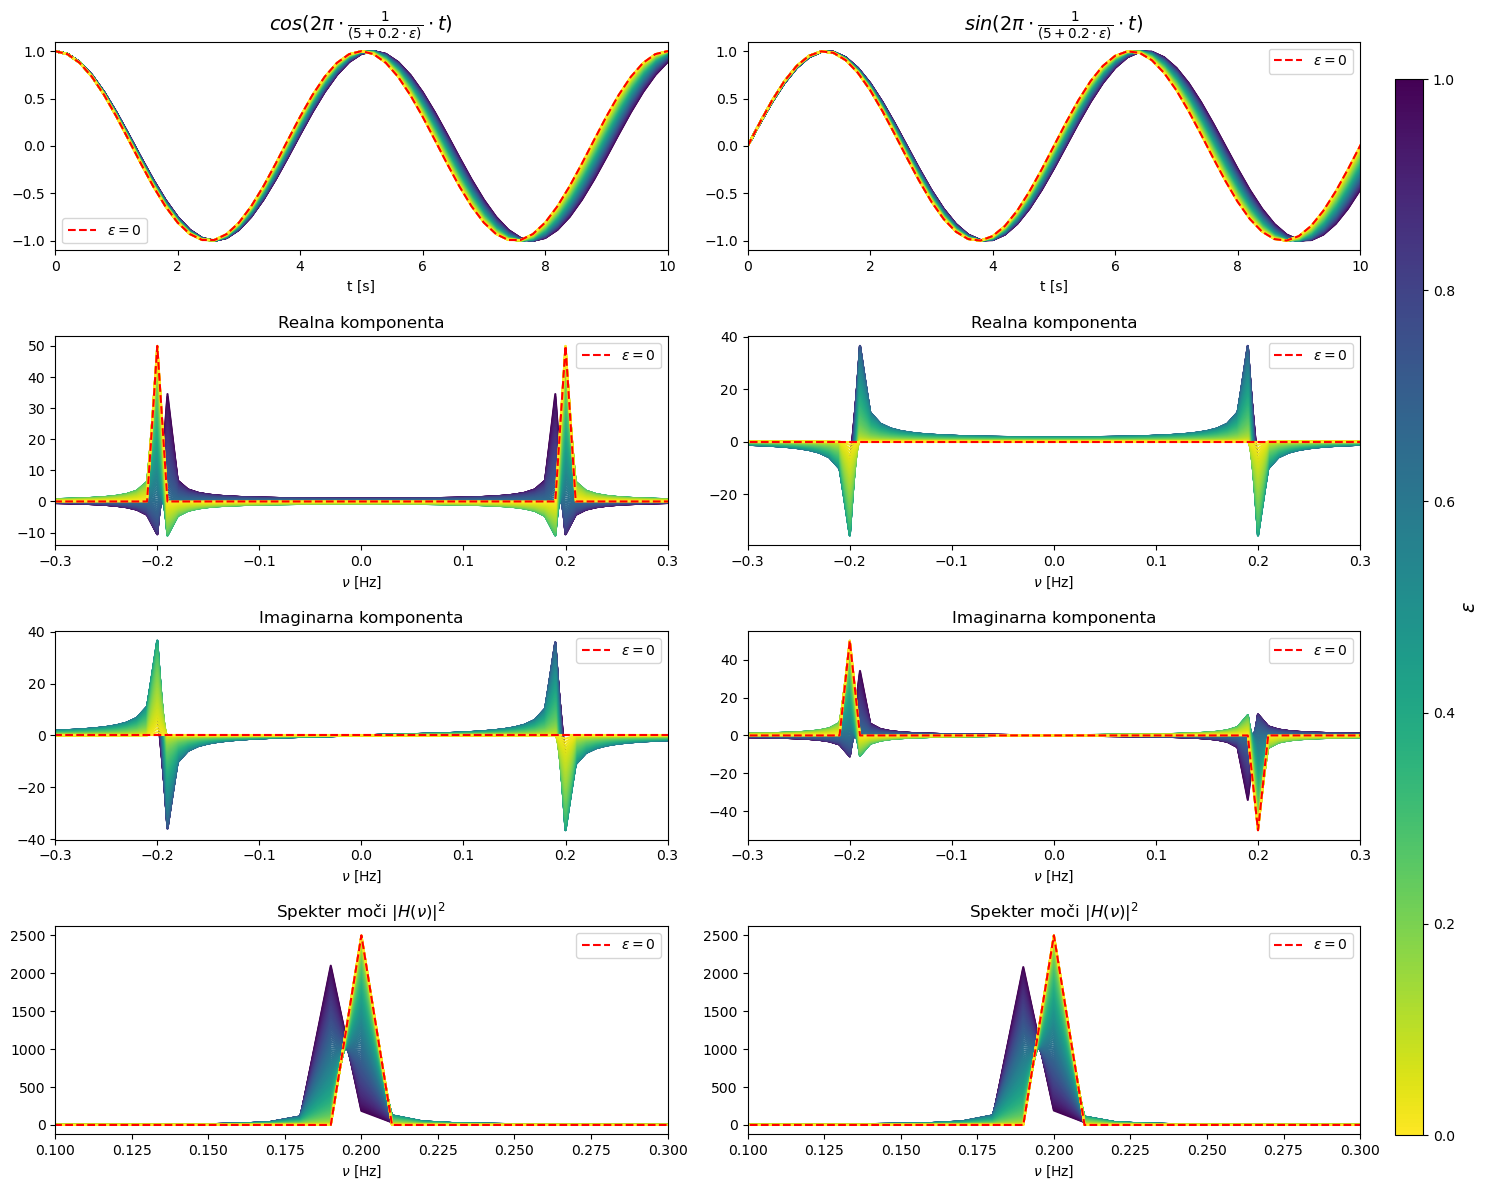

In [84]:
#puščanje/ leakage
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

t01s= 5 + np.array(np.linspace(0,0.2,100))[::-1]
fig, axes = plt.subplots(4, 2, figsize=(14, 12))  # 2 rows, 1 column of subplots
#nekaj osnovnih primerov:
T = 100
N = 500
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
cmap = plt.get_cmap("viridis_r")
norm = Normalize(vmin=min(t01s), vmax=max(t01s))
for ind,t01 in enumerate(t01s):
    f1 = 1/t01

    y1 = np.cos(2*np.pi * f1 * t)
    y2 = np.sin(2*np.pi * f1 * t)

    dft1 = np.roll(dt * np.fft.fft(y1),N//2)
    dft2 = np.roll(dt * np.fft.fft(y2),N//2)

    sqr1 = abs(dft1)**2
    sqr2 = abs(dft2)**2

    color=cmap(norm(t01s[ind]))

    axes[(0,0)].plot(t,y1,color=color)

    axes[(0,1)].plot(t,y2,color=color)

    axes[(1,0)].plot(nus,np.real(dft1), color=color) 
    axes[(2,1)].plot(nus,np.imag(dft2),color=color) 

    axes[(2,0)].plot(nus,np.imag(dft1),color=color) 
    axes[(1,1)].plot(nus,np.real(dft2),color=color) 

    axes[(3,0)].plot(nus,abs(dft1)**2,color=color) 
    axes[(3,1)].plot(nus,abs(dft2)**2,color=color) 

    

t01 = 5
f1 = 1/t01

y1 = np.cos(2*np.pi * f1 * t)
y2 = np.sin(2*np.pi * f1 * t)

dft1 = np.roll(dt * np.fft.fft(y1),N//2)
dft2 = np.roll(dt * np.fft.fft(y2),N//2)

sqr1 = abs(dft1)**2
sqr2 = abs(dft2)**2


axes[(0,0)].plot(t,y1,color='red',linestyle='--',label=r'$\epsilon=0$')
axes[(0,0)].set_xlim(0,10)

axes[(0,1)].plot(t,y2,color='red',linestyle='--',label=r'$\epsilon=0$')
axes[(0,1)].set_xlim(0,10)
axes[(1,0)].set_xlim(-1,1)
axes[(1,1)].set_xlim(-1,1)
axes[(1,0)].plot(nus,np.real(dft1), color='red',linestyle='--',label=r'$\epsilon=0$') 
axes[(2,1)].plot(nus,np.imag(dft2),color='red',linestyle='--',label=r'$\epsilon=0$') 

axes[(2,0)].plot(nus,np.imag(dft1),color='red',linestyle='--',label=r'$\epsilon=0$') 
axes[(1,1)].plot(nus,np.real(dft2),color='red',linestyle='--',label=r'$\epsilon=0$') 
axes[(3,0)].plot(nus,abs(dft1)**2,color='red',linestyle='--',label=r'$\epsilon=0$') 
axes[(3,1)].plot(nus,abs(dft2)**2,color='red',linestyle='--',label=r'$\epsilon=0$') 
axes[(0,0)].set_title(r"$cos(2 \pi \cdot \frac{1}{(5 + 0.2 \cdot \epsilon)} \cdot t)$", fontsize=14)
axes[(0,1)].set_title(r"$sin(2 \pi \cdot \frac{1}{(5 + 0.2 \cdot \epsilon)} \cdot t)$", fontsize=14)
axes[(1,0)].set_title("Realna komponenta")
axes[(2,0)].set_title("Imaginarna komponenta")
axes[(1,1)].set_title("Realna komponenta")
axes[(2,1)].set_title("Imaginarna komponenta")
axes[(3,1)].set_title(r'Spekter moči $|H(\nu)|^2$')
axes[(3,0)].set_title(r'Spekter moči $|H(\nu)|^2$')


axes[(1,0)].set_xlabel(r"$\nu$ [Hz]")
axes[(1,1)].set_xlabel(r"$\nu$ [Hz]")
axes[(2,0)].set_xlabel(r"$\nu$ [Hz]")
axes[(2,1)].set_xlabel(r"$\nu$ [Hz]")
axes[(3,0)].set_xlabel(r"$\nu$ [Hz]")
axes[(3,1)].set_xlabel(r"$\nu$ [Hz]")
axes[(1,0)].set_xlim(-0.3,0.3)
axes[(1,1)].set_xlim(-0.3,0.3)
axes[(2,0)].set_xlim(-0.3,0.3)
axes[(2,1)].set_xlim(-0.3,0.3)
axes[(3,0)].set_xlim(0.1,0.3)
axes[(3,1)].set_xlim(0.1,0.3)
axes[(0,0)].set_xlabel(r"t [s]")
axes[(0,1)].set_xlabel(r"t [s]")
axes[(0,0)].legend()
axes[(0,1)].legend()
axes[(1,0)].legend()
axes[(1,1)].legend()
axes[(2,0)].legend()
axes[(2,1)].legend()
axes[(3,0)].legend()
axes[(3,1)].legend()

cax = fig.add_axes([1, 0.05, 0.02, 0.88])
cbar = fig.colorbar(cm.ScalarMappable( cmap=cmap),cax=cax, ax=axes, label=r"$\lambda$",location='right')
cbar.set_label(r'$\epsilon$', fontsize=14)

plt.tight_layout()
plt.savefig('puscanje',bbox_inches='tight')

najmanjša frekvenca:  2.0
kritična frekvenca:  1.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1


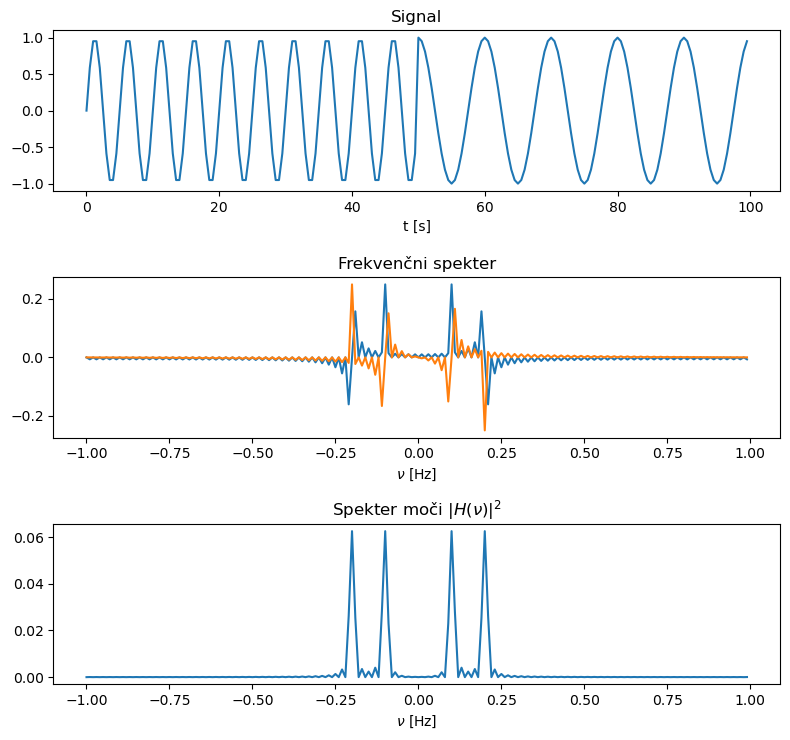

In [162]:

#T sekund N vzorcev
N= 200  #vecji N -> večji obseg frekvenc (vecji nu_c)
T = 100 #vecji T -> bolj natancna frekvenca?
#pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
dt = T/N
nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
print("najmanjša frekvenca: ", 1/dt)
print("kritična frekvenca: ", nu_c)


#generiramo signal
# x = np.linspace(-5,5,N)#, endpoint=False)
# x = np.linspace(-5,5,N, endpoint=False)

f = 0.5 #signal frekvenca
t = np.arange(0,T, dt)

t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
print("nu1 (sin)=",1./t01)
print("nu2 (cos)=",1./t02)

plt.figure(figsize=(8,7.5))
plt.subplot(3,1,1)
y1 =  np.sin(2*np.pi * 1/t01 * t[:N//2])   #t0i / T mora biti celo število, da dobimo celo periodo
y2 =  np.cos(2*np.pi * 1/t02 * t[N//2:])  #t0i / T mora biti celo število, da dobimo celo periodo
y = np.concatenate((y1,y2))
plt.plot(t,y)
# plt.xlim(450,550)
plt.title('Signal')
plt.xlabel(r"t [s]")



nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
dft = 1/N * np.roll(DFT(y), N//2)

plt.subplot(3,1,2)
plt.title('Frekvenčni spekter')
plt.plot(nus, np.real(dft))
# plt.figure()
plt.plot(nus, np.imag(dft))
plt.xlabel(r"$\nu$ [Hz]")
# plt.xlim(-0.3,0.3)
# plt.figure()
# plt.plot( np.arange(N), np.imag(DFT_slow(y)))
    
plt.subplot(3,1,3)
plt.title(r'Spekter moči $|H(\nu)|^2$')
# plt.plot(nus, np.real(dft))
# plt.figure()
# plt.plot(nus, np.imag(dft))
# plt.xlim(-0.3,0.3)
plt.xlabel(r"$\nu$ [Hz]")
plt.plot(nus, abs(dft)**2)

plt.tight_layout()
plt.savefig('mesan_signal')
    

In [15]:
# obratna transformacija

def IDFT(y):
    N = np.shape(y)[0]
    # k = np.arange(N)
    n = np.arange(N)
    c = np.zeros(np.shape(y), complex)
    for k in range(N):
        c[k] = np.sum(y * np.exp(2j * np.pi * k * n/N))
    return c/N




kritična:  2.5
min:  5.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1
nu2 (cos)= 0.05


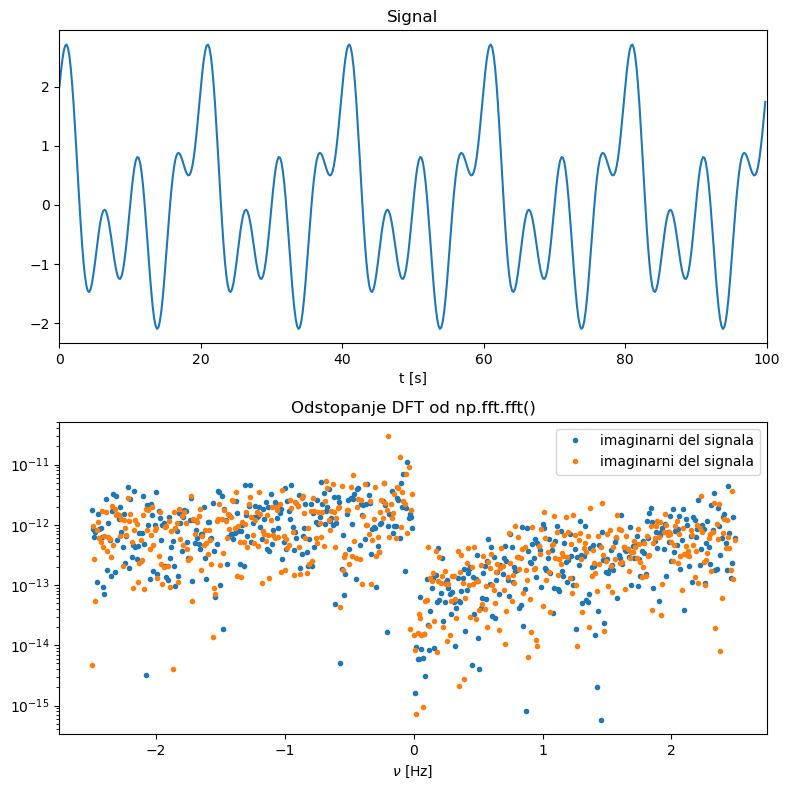

In [116]:
# primerjajmo z np.fft()
#lahko nareiš še primerjavo za različne dt

T = 100
N = 500
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
print("kritična: ",nu_c)
print("min: ",nu_min)

f = 0.5 #signal frekvenca
t = np.arange(0,T, dt)

t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
t03 = 20
print("nu1 (sin)=",1./t01)
print("nu2 (cos)=",1./t02)
print("nu2 (cos)=",1./t03)

#šum:
seed = 10
a = 0
noise = (np.random.random(len(t))) * (2 * a) - a
# print(noise * 3)

y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5


fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column of subplots
axes[0].plot(t,y, label='začetni signal')
axes[0].set_xlim(0,100)
axes[0].set_title('Signal')

nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
dft_i = DFT(y)
dft = np.roll(dft_i, N//2)
thresh = 2/3

dft_np = np.fft.fft(y)


axes[1].set_title('Odstopanje DFT od np.fft.fft()')
# axes.plot(nus, np.roll(abs(dft_i - dft_np), N//2), label='realni del signala')
# axes.plot(nus, np.roll(abs(dft_i - dft_np)/dft_np, N//2), label='realni del signala') #relativna napaka velika

axes[1].plot(nus, abs(np.roll(np.imag(dft_i) - np.imag(dft_np), N//2)), label='imaginarni del signala', marker='.', linestyle='')
axes[1].plot(nus, abs(np.roll(np.real(dft_i) - np.real(dft_np), N//2)), label='imaginarni del signala', marker='.', linestyle='')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r"$\nu$ [Hz]")
axes[0].set_xlabel(r"t [s]")
plt.tight_layout()

# axes.grid()
plt.savefig('odstopanje_od_fft')


In [14]:
# Časovna primerjava:
dft_np = []
dft_moj = []
dft_slow = []

for T,N in [(10,20), (100,200), (1000,2000), (10000,20000)]:# (100000,200000)]:
    print(T,N)
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    # print("kritična: ",nu_c)
    # print("min: ",nu_min)
    
    t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
    t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
    t03 = 20
    # print("nu1 (sin)=",1./t01)
    # print("nu2 (cos)=",1./t02)
    # print("nu2 (cos)=",1./t03)

    #šum:
    seed = 10
    a = 0
    noise = (np.random.random(len(t))) * (2 * a) - a
    # print(noise * 3)

    y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5
    start_time = time.time()
    dft_1 = DFT(y)
    end_time = time.time()
    execution_time = end_time - start_time
    dft_moj.append(execution_time)
    
    start_time = time.time()
    dft_2 = DFT_slow(y)
    end_time = time.time()
    execution_time = end_time - start_time
    dft_slow.append(execution_time)

    start_time = time.time()
    dft_3 = np.fft.fft(y)
    end_time = time.time()
    execution_time = end_time - start_time
    dft_np.append(execution_time)

    # dft_np = np.fft.fft(y)

    # fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column of subplots
    # axes[0].plot(t,y, label='začetni signal')
    # axes[0].set_xlim(0,100)
    # axes[0].set_title('Signal')

    # nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 


    # axes[1].set_title('Odstopanje DFT od np.fft.fft()')
    # # axes.plot(nus, np.roll(abs(dft_i - dft_np), N//2), label='realni del signala')
    # # axes.plot(nus, np.roll(abs(dft_i - dft_np)/dft_np, N//2), label='realni del signala') #relativna napaka velika

    # axes[1].plot(nus, abs(np.roll(np.imag(dft_i) - np.imag(dft_np), N//2)), label='imaginarni del signala', marker='.', linestyle='')
    # axes[1].plot(nus, abs(np.roll(np.real(dft_i) - np.real(dft_np), N//2)), label='imaginarni del signala', marker='.', linestyle='')
    # axes[1].set_yscale('log')
    # axes[1].legend()


10 20
100 200
1000 2000
10000 20000


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

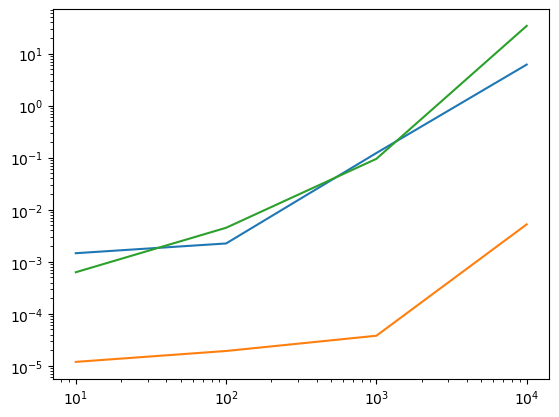

In [19]:
Ts = []
Ns = []

for T,N in [(10,20), (100,200), (1000,2000), (10000,20000)]:
    Ts.append(T)
    Ns.append(N)


plt.plot(Ts, dft_moj)
plt.plot(Ts, dft_np)
plt.plot(Ts, dft_slow)
plt.xscale('log')
plt.yscale('log')

In [11]:

def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.uint64)

Ns = gen_log_space(100000, 20)[1:]
print(Ns)


T = 1000
# ns = np.arange(1,100,1)
# extended = np.array([200, 500, 1000])
# ns = np.concatenate((ns,extended))
# lambs=[0.5]

# time_moj = []
# err_moj = []

# for N in Ns:
#     time_moj_temp = []
#     t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 0
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = DFT(y)
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_moj_temp.append(elapsed_time)
#     time_moj.append(np.average(time_moj_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_moj.append(np.std(time_moj_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close
#     print(N)
# np.save("time_moj_10", time_moj)
# np.save("err_moj_10", err_moj)



time_slow = []
err_slow = []

for N in Ns:
    time_slow_temp = []
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    
    t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
    t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
    t03 = 20

    #šum:
    seed = 10
    a = 0
    noise = (np.random.random(len(t))) * (2 * a) - a

    y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

    for _ in range(8):
        start_time = time.time()
        res = DFT_slow(y)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_slow_temp.append(elapsed_time)
    time_slow.append(np.average(time_slow_temp)) #povprecen cas za izracun qr za 50 lamb
    err_slow.append(np.std(time_slow_temp)) #povprecen cas za izracun qr za 5 lamb
    print(N)
    plt.close
np.save("time_slow_10", time_slow)
np.save("err_slow_10", err_slow)


# time_np = []
# err_np = []

# for N in Ns:
#     time_np_temp = []
#     t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    
#     t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
#     t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
#     t03 = 20

#     #šum:
#     seed = 10
#     a = 0
#     noise = (np.random.random(len(t))) * (2 * a) - a

#     y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

#     for _ in range(8):
#         start_time = time.time()
#         res = np.fft.fft(y)
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         time_np_temp.append(elapsed_time)
#     time_np.append(np.average(time_np_temp)) #povprecen cas za izracun qr za 50 lamb
#     err_np.append(np.std(time_np_temp)) #povprecen cas za izracun qr za 5 lamb
#     plt.close()
#     print(N)
# np.save("time_np_10", time_np)
# np.save("err_np_10", err_np)




[   1    2    4    7   12   20   33   54   87  140  226  363  584  938
 1506 2417 3881 6229 9999]
1
2
4
7
12
20
33
54
87
140
226
363
584
938
1506
2417
3881
6229
9999


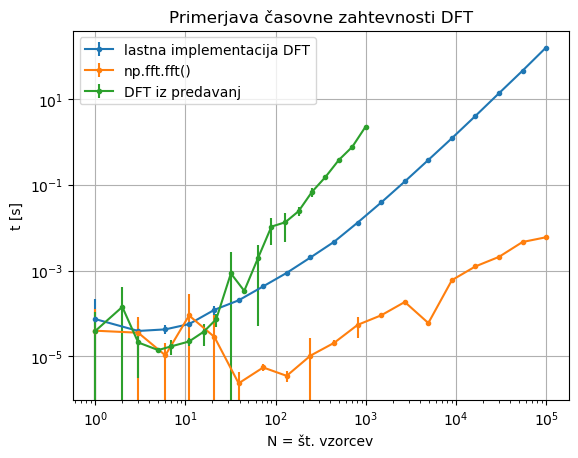

In [13]:
time_moj = np.load("time_moj_10.npy")
time_np = np.load("time_np_10.npy")
time_slow = np.load("time_slow_10.npy")
err_moj = np.load("err_moj_10.npy")
err_np = np.load("err_np_10.npy")
err_slow = np.load("err_slow_10.npy")

Ns = gen_log_space(100000, 20)[1:]
plt.errorbar(Ns, time_moj,yerr=err_moj, linestyle='-', marker='.', label='lastna implementacija DFT')
plt.errorbar(Ns, time_np,yerr=err_np, linestyle='-', marker='.',label='np.fft.fft()')
Ns = gen_log_space(1000, 20)[1:]
plt.errorbar(Ns, time_slow,yerr=err_slow, linestyle='-', marker='.', label='DFT iz predavanj')
# plt.plot(Ns, time_gs)
# plt.plot(Ns, time_giv)
# plt.plot(Ns, time_la_qr)
plt.yscale('log')
plt.xscale('log')
plt.title('Primerjava časovne zahtevnosti DFT')
plt.xlabel('N = št. vzorcev')
plt.ylabel(r't [s]')
plt.grid()
plt.legend()
plt.savefig('DFT_cas_1')
#T=1000

In [ ]:
#Parsevalova enačba


T1 = 10
N1 = 50
t1,nus1, nu_c1, nu_min1, dt1 = vzorec_prep(T1, N1)
print("kritična: ",nu_c1)
print("min: ",nu_min1)

T2 = 10
N2 = 500
t2,nus2, nu_c2, nu_min2, dt2 = vzorec_prep(T2, N2)
print("kritična: ",nu_c2)
print("min: ",nu_min2)
#frekvenci, ki dasta celo periodo
# f1 = (2*T)/T
# f2 = 100/T
t01 = 5
t02 = 10
t03 = 0.05
f1 = 1/t01
f2 = 1/t02
f3 = 1/t03
print(f1,f2,f3)

#šum:
seed = 10
a = 0
noise1 = (np.random.random(len(t1))) * (2 * a) - a
noise2 = (np.random.random(len(t2))) * (2 * a) - a
# print(noise * 3)

y1 =  np.sin(2*np.pi * 1/t01 * t1) + np.cos(2*np.pi * 1/t02 * t1) + np.cos(2*np.pi * 1/t03 * t1) + noise1 * 5
y1 =  np.sin(2*np.pi * 1/t01 * t1) + np.cos(2*np.pi * 1/t03 * t1) + noise1 * 5
y2 =  np.sin(2*np.pi * 1/t01 * t2) + np.cos(2*np.pi * 1/t02 * t2) + np.cos(2*np.pi * 1/t03 * t2) + noise2 * 5
y2 =  np.sin(2*np.pi * 1/t01 * t2) + np.cos(2*np.pi * 1/t03 * t2) + noise2 * 5

t = np.linspace(0,T,1000000)
noise = (np.random.random(len(t))) * (2 * a) - a
y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5
y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5

dft1 = dt1 * DFT(y1, roll=True)
dft2 = dt2 * DFT(y2, roll=True)

sqr1 = abs(dft1)**2
sqr2 = abs(dft2)**2

fig, axes = plt.subplots(3, 2, figsize=(12, 8))  # 2 rows, 1 column of subplots

axes[(0,0)].plot(t,abs(y)**2, linestyle='-', marker='',label='Signal')
axes[(0,0)].plot(t1,y1, linestyle='', marker='o',label='Vzorčenje')
axes[(0,0)].set_xlim(0,10)
axes[(1,0)].plot(t,y, linestyle='-', marker='',label='Signal')
axes[(1,0)].plot(t1,y1, linestyle='', marker='o',label='Vzorčenje')
axes[(1,0)].set_xlim(0,1)

axes[(0,1)].plot(t,y, linestyle='-', marker='',label='Signal')
axes[(0,1)].plot(t2,y2, linestyle='', marker='.',label='Vzorčenje')
axes[(0,1)].set_xlim(0,10)
axes[(1,1)].plot(t,y, linestyle='-', marker='',label='Signal')
axes[(1,1)].plot(t2,y2, linestyle='', marker='o',label='Vzorčenje')
axes[(1,1)].set_xlim(0,1)

axes[(2,0)].plot(nus1,np.real(dft1), label='realni del signala')
axes[(2,1)].plot(nus2,np.real(dft2), label='realni del signala')
axes[(2,1)].plot(nus2,np.imag(dft2), label='imaginarni del signala')

axes[(2,0)].plot(nus1,np.imag(dft1), label='imaginarni del signala')
axes[(0,0)].set_title("Signal (T=10s) vzorčen z N = 50")
axes[(0,1)].set_title("Signal (T=10s) vzorčen z N = 500")
axes[(1,0)].set_title("Približano vzorčenje signala")
axes[(1,1)].set_title("Približano vzorčenje signala")
axes[(2,0)].set_title("Frekvenčni spekter")
axes[(2,1)].set_title("Frekvenčni spekter")
axes[(2,0)].set_xlabel(r"$\nu$ [Hz]")
axes[(2,1)].set_xlabel(r"$\nu$ [Hz]")
axes[(1,0)].set_xlabel(r"t [s]")
axes[(1,1)].set_xlabel(r"t [s]")
axes[(0,0)].set_xlabel(r"t [s]")
axes[(0,1)].set_xlabel(r"t [s]")

axes[(0,0)].legend()
axes[(0,1)].legend()
axes[(1,1)].legend()
axes[(1,0)].legend()
axes[(2,0)].legend()
axes[(2,1)].legend()
plt.tight_layout()


# plt.figure(figsize=(12,8))
# plt.subplot(3,1,1)
# plt.plot(t,y)
# plt.subplot(3,1,2)
# plt.plot(t,y)
# plt.xlim(0,10)

# plt.subplot(3,1,3)
# plt.plot(t,y)
# plt.xlim(0,1)
# axes[(2,0)].plot(nus, sqr1, label='|DFT|')
# axes[(2,1)].plot(nus, sqr2, label='|DFT|')

plt.tight_layout()
plt.savefig('potujitev')

najmanjša frekvenca:  2.0
kritična frekvenca:  1.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1
nu2 (cos)= 0.05
[-0.1  -0.05  0.05  0.1 ]
[-0.2  0.2]


/Users/lukapuslar/miniconda3/envs/torch_m1/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


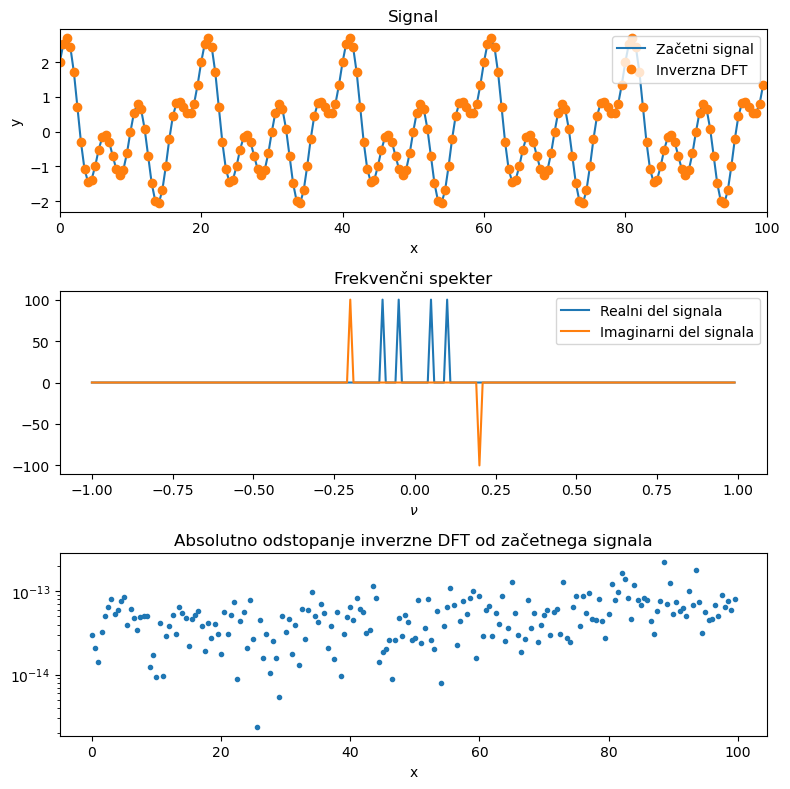

In [246]:
#poglejmo si obratno transformacijo

#T sekund N vzorcev
N= 200 #vecji N -> večji obseg frekvenc (vecji nu_c)
T = 100 #vecji T -> bolj natancna frekvenca?
#pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba

dt = T/N
nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
print("najmanjša frekvenca: ", 1/dt)
print("kritična frekvenca: ", nu_c)

f = 0.5 #signal frekvenca
t = np.arange(0,T, dt)

t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
t03 = 20
print("nu1 (sin)=",1./t01)
print("nu2 (cos)=",1./t02)
print("nu2 (cos)=",1./t03)

#šum:
seed = 10
a = 0
noise = (np.random.random(len(t))) * (2 * a) - a
# print(noise * 3)

y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5


fig, axes = plt.subplots(3, 1, figsize=(8, 8))  # 2 rows, 1 column of subplots
axes[0].plot(t,y, label='Začetni signal')
axes[0].set_xlim(0,100)

nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
dft_i = DFT(y)
dft = np.roll(dft_i, N//2)
thresh = 2/3
print(nus[np.where(np.real(dft) > thresh * max(np.real(dft)))])
print(nus[np.where(abs(np.imag(dft)) > thresh * max(abs(np.imag(dft))))])
# dft[np.where(np.real(dft) < thresh * max(np.real(dft)))] = 0


# plt.figure()
axes[1].plot(nus, np.real(dft), label='Realni del signala')
# plt.figure()
axes[1].plot(nus, np.imag(dft), label='Imaginarni del signala')
# plt.xlim(-1,1)
axes[1].set_title("Frekvenčni spekter")
axes[1].legend()
# axes[1].grid()
axes[1].set_xlabel(r"$\nu$ [Hz]")
axes[0].set_ylabel("y")


idft = IDFT(dft_i)
axes[0].plot(t[:], idft[:], 'o', label='Inverzna DFT')
axes[0].legend()
# axes[0].grid()
axes[0].set_xlabel("x")
axes[2].set_xlabel("x")
# axes[0].set_ylabel("f(x)")
axes[0].set_title("Signal")

# plt.figure()
axes[2].set_title("Absolutno odstopanje inverzne DFT od začetnega signala")
axes[2].plot(t, abs(idft-y), '.')
axes[2].set_yscale('log')

plt.tight_layout()
# plt.xscale('log')
plt.savefig('inverzna')


najmanjša frekvenca:  2.0
kritična frekvenca:  1.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1
nu2 (cos)= 0.05
[0. 0. 0. ... 0. 0. 0.]
najmanjša frekvenca:  2.0
kritična frekvenca:  1.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1
nu2 (cos)= 0.05
[-0.1  -0.05  0.05  0.1 ]
[-0.2  0.2]


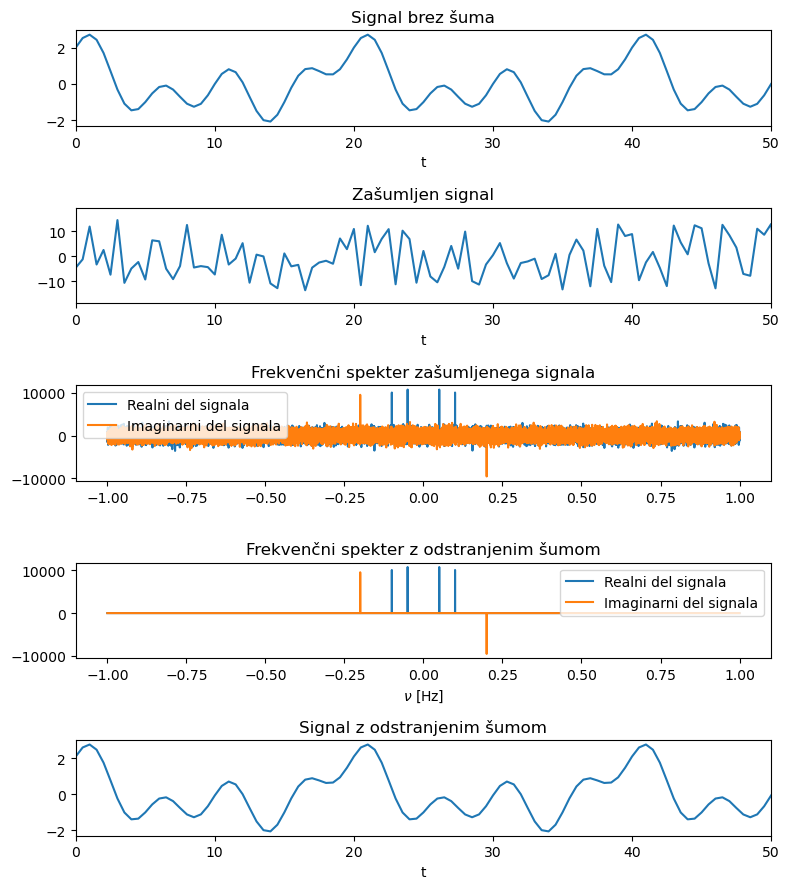

In [26]:
# Poglejmo si kako se DFT spopade s šumom

#T sekund N vzorcev
N= 20000  #vecji N -> večji obseg frekvenc (vecji nu_c)
T = 10000  #vecji T -> bolj natancna frekvenca?
#pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba

dt = T/N
nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
print("najmanjša frekvenca: ", 1/dt)
print("kritična frekvenca: ", nu_c)

f = 0.5 #signal frekvenca
t = np.arange(0,T, dt)

t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
t03 = 20
print("nu1 (sin)=",1./t01)
print("nu2 (cos)=",1./t02)
print("nu2 (cos)=",1./t03)

#šum:
seed = 10
a = 0
noise = (np.random.random(len(t))) * (2 * a) - a
print(noise * 3)

y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5
plt.figure(figsize=(8,9))
plt.subplot(5,1,1)
plt.title('Signal brez šuma')
plt.xlabel('t')
plt.plot(t,y)
plt.xlim(0,50)

nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
dft = np.roll(DFT(y), N//2)
thresh = 2/3


#T sekund N vzorcev
N= 20000  #vecji N -> večji obseg frekvenc (vecji nu_c)
T = 10000  #vecji T -> bolj natancna frekvenca?
#pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
dt = T/N
nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
print("najmanjša frekvenca: ", 1/dt)
print("kritična frekvenca: ", nu_c)

f = 0.5 #signal frekvenca
t = np.arange(0,T, dt)

t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
t03 = 20

print("nu1 (sin)=",1./t01)
print("nu2 (cos)=",1./t02)
print("nu2 (cos)=",1./t03)

#šum:
seed = 10
a = 3
noise = (np.random.random(len(t))) * (2 * a) - a
# print(noise * 3)

y =  np.sin(2*np.pi * 1/t01 * t) + np.cos(2*np.pi * 1/t02 * t) + np.cos(2*np.pi * 1/t03 * t) + noise * 5
plt.subplot(5,1,2)
plt.xlabel('t')
plt.title('Zašumljen signal')
plt.plot(t,y)
plt.xlim(0,50)

nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 
dft = np.roll(DFT(y), N//2)
thresh = 2/3
print(nus[np.where(np.real(dft) > thresh * max(np.real(dft)))])
print(nus[np.where(abs(np.imag(dft)) > thresh * max(abs(np.imag(dft))))])

plt.subplot(5,1,3)
plt.title('Frekvenčni spekter zašumljenega signala')
plt.plot(nus, np.real(dft),label='Realni del signala')
# plt.figure()
plt.plot(nus, np.imag(dft),label='Imaginarni del signala')
plt.legend()


dft_c = dft.copy()
dft_c[np.where(np.real(dft) < thresh * max(np.real(dft)))] = np.imag(dft[np.where(np.real(dft) < thresh * max(np.real(dft)))]) * 1j
dft_c[np.where(abs(np.imag(dft)) < thresh * max(abs(np.imag(dft))))] = np.real(dft_c[np.where(abs(np.imag(dft)) < thresh * max(abs(np.imag(dft))))])


plt.subplot(5,1,4)

plt.plot(nus, np.real(dft_c),label='Realni del signala')
plt.plot(nus, np.imag(dft_c),label='Imaginarni del signala')
plt.xlabel(r"$\nu$ [Hz]")
plt.title('Frekvenčni spekter z odstranjenim šumom')
plt.legend()

plt.subplot(5,1,5)


idft = IDFT(np.roll(dft_c,N//2))

plt.plot(t,idft)
plt.xlim(0,50)
plt.xlabel('t')
plt.title('Signal z odstranjenim šumom')
plt.tight_layout()

plt.savefig('odstranitev_suma')

najmanjša frekvenca:  2.0
kritična frekvenca:  1.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1


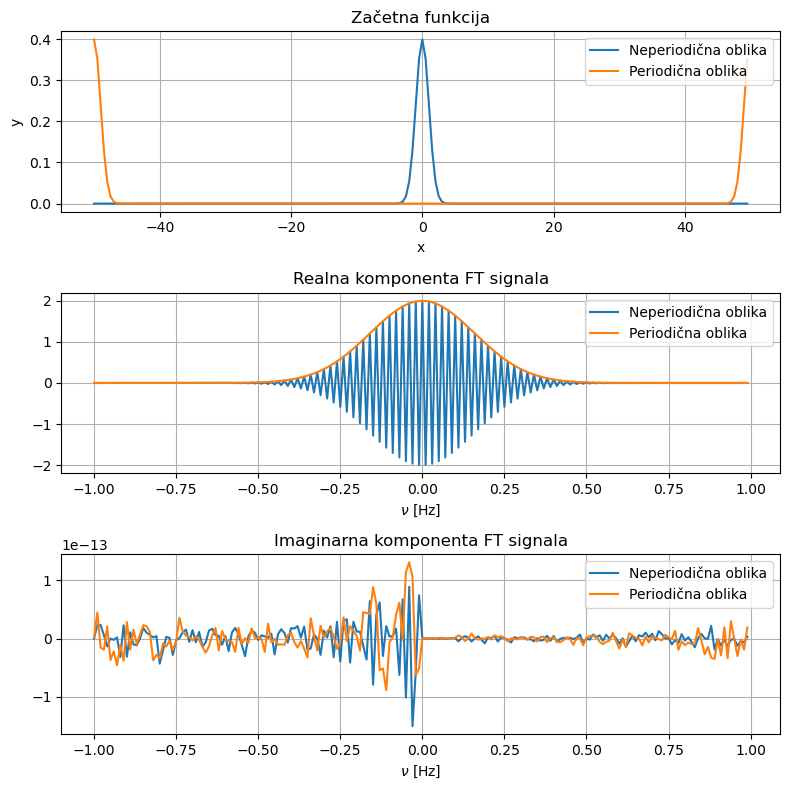

In [127]:
#tukej lahko slider nardis


#T sekund N vzorcev
N= 200  #vecji N -> večji obseg frekvenc (vecji nu_c)
T = 100  #vecji T -> bolj natancna frekvenca?
#pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
dt = T/N
nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
print("najmanjša frekvenca: ", 1/dt)
print("kritična frekvenca: ", nu_c)

nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 

#generiramo signal
# x = np.linspace(-5,5,N)#, endpoint=False)
# x = np.linspace(-5,5,N, endpoint=False)

f = 0.5 #signal frekvenca
t = np.arange(-T//2,T//2, dt)

t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
print("nu1 (sin)=",1./t01)
print("nu2 (cos)=",1./t02)

y =  gaus(t,0,1)
y_period = np.roll(y,len(y)//2) 

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,y, label='Neperiodična oblika')
plt.plot(t,y_period, label='Periodična oblika')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Začetna funkcija')
#dft privzema, da je funkcija, ki jo vzorcimo periodična, zato jo preslikamo tako, da bo periodična



# res_p = DFT(y_period, roll=False)
res_p = DFT(y_period, roll=True)
# res = DFT(y, roll=False)
res = DFT(y, roll=True)

# plt.figure()
plt.subplot(3,1,2)
plt.plot(nus,np.real(res), label='Neperiodična oblika')
plt.plot(nus,np.real(res_p), label='Periodična oblika')
plt.legend()
plt.grid()
plt.title('Realna komponenta FT signala')
plt.xlabel(r"$\nu$ [Hz]")
# plt.figure()
plt.subplot(3,1,3)
plt.plot(nus,np.imag(res), label='Neperiodična oblika')
plt.plot(nus,np.imag(res_p), label='Periodična oblika')
plt.legend()
plt.grid()
plt.title('Imaginarna komponenta FT signala')
plt.xlabel(r'$\nu$ [Hz]')
# plt.xlim(-1,1)
plt.tight_layout()
plt.savefig('Gaus')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


najmanjša frekvenca:  2.0
kritična frekvenca:  1.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1
najmanjša frekvenca:  0.2
kritična frekvenca:  0.1
nu1 (sin)= 0.2
nu2 (cos)= 0.1
najmanjša frekvenca:  2.0
kritična frekvenca:  1.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1
najmanjša frekvenca:  20.0
kritična frekvenca:  10.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1
najmanjša frekvenca:  200.0
kritična frekvenca:  100.0
nu1 (sin)= 0.2
nu2 (cos)= 0.1


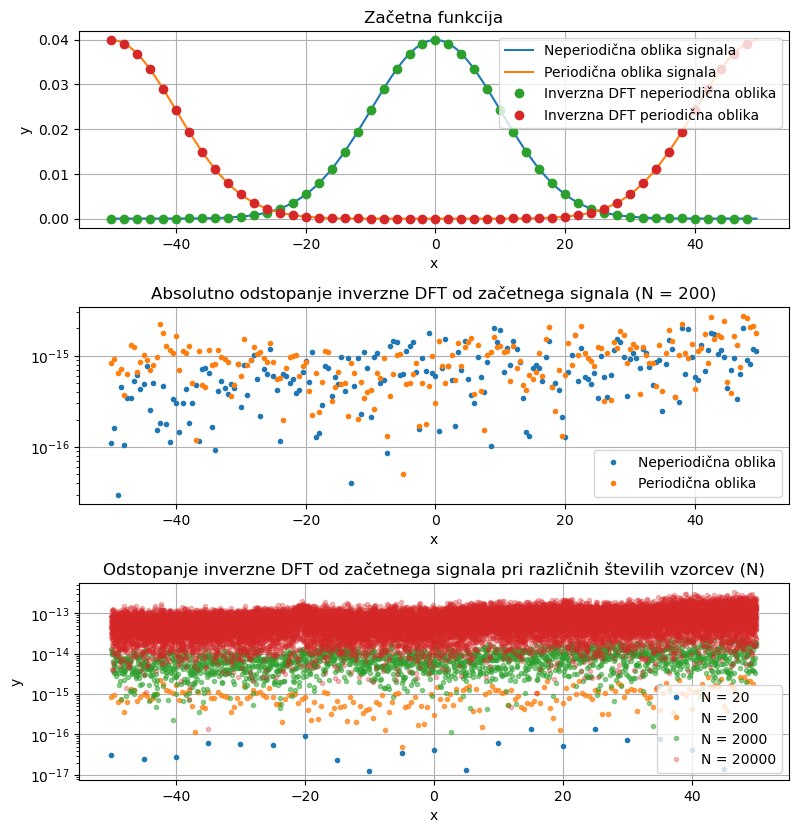

In [130]:
#tukej lahko slider nardis


#T sekund N vzorcev
N= 200  #vecji N -> večji obseg frekvenc (vecji nu_c)
T = 100  #vecji T -> bolj natancna frekvenca?
#pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
dt = T/N
nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
print("najmanjša frekvenca: ", 1/dt)
print("kritična frekvenca: ", nu_c)

nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 

#generiramo signal
# x = np.linspace(-5,5,N)#, endpoint=False)
# x = np.linspace(-5,5,N, endpoint=False)

f = 0.5 #signal frekvenca
t = np.arange(-T//2,T//2, dt)

t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
print("nu1 (sin)=",1./t01)
print("nu2 (cos)=",1./t02)

y =  gaus(t,0,10)
y_period = np.roll(y,len(y)//2) 

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,y, label='Neperiodična oblika signala')
plt.plot(t,y_period, label='Periodična oblika signala')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Začetna funkcija')
#dft privzema, da je funkcija, ki jo vzorcimo periodična, zato jo preslikamo tako, da bo periodična



res_p = DFT(y_period, roll=True)
res_p = DFT(y_period, roll=False)
res = DFT(y, roll=True)
res = DFT(y, roll=False)

idft_p = IDFT(res_p)
idft = IDFT(res)

b = 4
plt.plot(t[::b],idft[::b], 'o', label='Inverzna DFT neperiodična oblika')
plt.plot(t[::b],idft_p[::b], 'o', label='Inverzna DFT periodična oblika')
plt.legend(loc='upper right')

plt.subplot(3,1,2)
plt.legend()
plt.grid()
plt.title('Inverzna DFT')
plt.title("Absolutno odstopanje inverzne DFT od začetnega signala (N = 200)")
plt.plot(t, abs(idft-y), '.', label='Neperiodična oblika')
plt.plot(t, abs(idft_p-y_period), '.', label='Periodična oblika')
plt.legend()
plt.yscale('log')
plt.xlabel(r'x')
# plt.xlim(-1,1)
plt.tight_layout()
# plt.figure()

plt.subplot(3,1,3)
alphas= [1,0.7,0.5,0.3]
for ind,N in enumerate([20,200,2000,20000]):
    #T sekund N vzorcev
    T = 100  #vecji T -> bolj natancna frekvenca?
    #pomemben je dt -> nam dejansko pove kaksna bo informacija, ce hocemo več frekvenc in vseeno veliko natančnost moramo zvečati oba
    dt = T/N
    nu_c = 1/2 * 1/dt  #največja frekvenca ki jo lahko zaznamo
    print("najmanjša frekvenca: ", 1/dt)
    print("kritična frekvenca: ", nu_c)

    nus = np.linspace(-nu_c, nu_c, N, endpoint=False) 

    #generiramo signal
    # x = np.linspace(-5,5,N)#, endpoint=False)
    # x = np.linspace(-5,5,N, endpoint=False)

    f = 0.5 #signal frekvenca
    t = np.arange(-T//2,T//2, dt)

    t01 = 5 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
    t02 = 10 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
    print("nu1 (sin)=",1./t01)
    print("nu2 (cos)=",1./t02)

    y =  gaus(t,0,10)
    y_period = np.roll(y,len(y)//2) 

    res_p = DFT(y_period, roll=False)

    idft_p = IDFT(res_p)
    plt.plot(t, abs(idft_p-y_period), '.', label=f'N = {N}', alpha=alphas[ind])
    # if N == 20000:
    #     plt.plot(t[::10], abs(idft_p-y_period)[::10], '.', label=f'N = {N}', alpha=alphas[ind])

# plt.plot(t,y, label='Neperiodična oblika')
# plt.plot(t,y_period, label='Periodična oblika')
# t,odstopanje = np.load("t_for_gaus_odstopanje.npy"), np.load("abs_for_gaus_odstopanje.npy")
# plt.plot(t, odstopanje, '.', label=f'N = {N}', alpha=0.2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Odstopanje inverzne DFT od začetnega signala pri različnih številih vzorcev (N)')
plt.legend()
#dft privzema, da je funkcija, ki jo vzorcimo periodična, zato jo preslikamo tako, da bo periodična
plt.savefig('gaus_inv')


[1.0, 1.0, 0.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 6.0, 7.0, 7.0, 8.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 0.0, 0.0, 2.0, -1.0, 0.0, 0.0, -1.0, -2.0, 0.0, -4.0, -4.0, -1.0, -4.0, -6.0, -4.0, -5.0, -3.0, -3.0, -3.0, -1.0, -2.0, -4.0, -1.0, -2.0, -6.0, -3.0, -2.0, -1.0, -2.0, -2.0, -2.0, -2.0, -3.0, -1.0, -1.0, -1.0, -3.0, -2.0, -2.0, -2.0, -1.0, -2.0, -3.0, -6.0, -5.0, -5.0, -4.0, -2.0, -4.0, -7.0, -5.0, -5.0, -7.0, -6.0, -8.0, -7.0, -3.0, -6.0, -6.0, -8.0, -11.0, -9.0, -8.0, -7.0, -7.0, -9.0, -9.0, -9.0, -9.0, -7.0, -8.0, -9.0, -7.0, -6.0, -7.0, -3.0, -5.0, -2.0, -2.0, 0.0, -4.0, -7.0, -8.0, -7.0, -8.0, -7.0, -9.0, -5.0, -5.0, -5.0, -6.0, -8.0, -7.0, -6.0, -7.0, -7.0, -7.0, -7.0, -9.0, -10.0, -8.0, -6.0, -7.0, -6.0, -6.0, -5.0, -6.0, -2.0, -2.0, -4.0, -6.0, -3.0, -2.0, -5.0, -3.0, -3.0, -4.0, -4.0, -7.0, -8.0, -4.0, -4.0, -7.0, -4.0, -2.0, -4.0, -6.0, -5.0, -6.0, -4.0, -6.0, -5.0, -5.0, -7.0, -6.0, -5.0, -6.0, -8.0, -8.0, -7.0, -7.0, -10.0, -9.0, -7.0, -11.0, -8.0, -7.0, -6.0, -7.0, -9.

(200.0, 450.0)

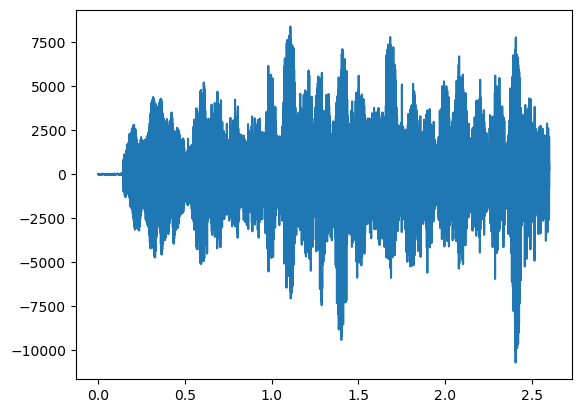

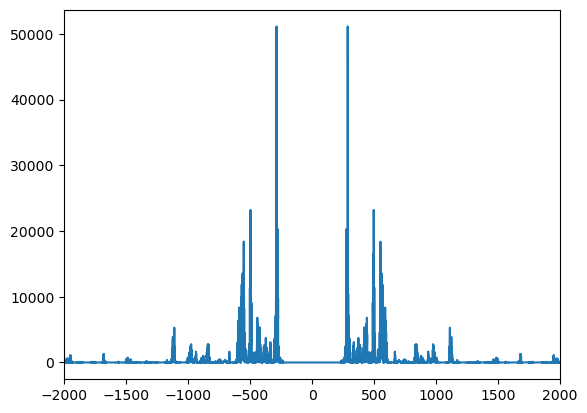

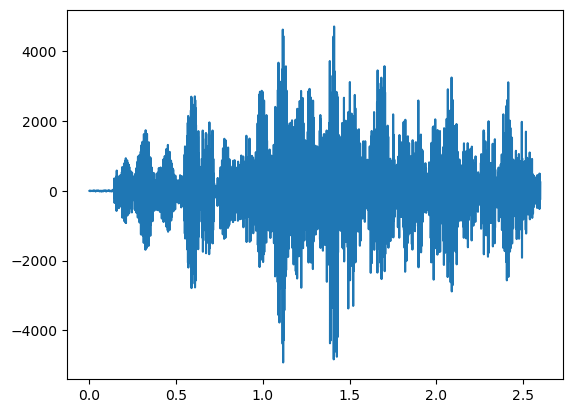

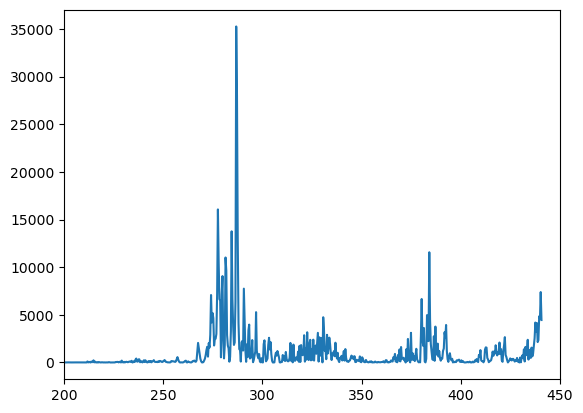

In [10]:
# poskusimo prebrati Bacha
file_path = "Bach.44100.txt"
y = []
with open(file_path, "r") as file:
    for line in file:
        y.append(float(line.strip()))

print(y)
dt = 1/882
dt = 1/44100
t = np.arange(0,len(y) * dt, dt)
plt.plot(t,y)

T = len(y) * dt
N = len(y)
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
print("kritična: ",nu_c)
print("min: ",nu_min)

plt.figure()
dft = 1/N * np.fft.fft(y)
plt.plot(nus, abs(np.roll(dft,N//2))**2)
plt.xlim(-2000,2000)


# poskusimo prebrati Bacha
file_path = "Bach.882.txt"
y = []
with open(file_path, "r") as file:
    for line in file:
        y.append(float(line.strip()))

plt.figure()
# print(y)
# dt = 1/44100
dt = 1/882
t = np.arange(0,len(y) * dt, dt)
plt.plot(t,y)

T = len(y) * dt
N = len(y)
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
print("kritična: ",nu_c)
print("min: ",nu_min)

plt.figure()
# dft = 1/N * np.fft.fft(y)
dft = 1/N * DFT(y)
plt.plot(nus[N//2:], abs(np.roll(dft,N//2)[N//2:])**2)
# plt.plot(nus[:], abs(np.roll(dft,N//2)[:])**2)
print(abs(np.roll(dft,N//2)[N//2:]))
plt.xlim(200,450)

kritična:  441.0
min:  882.0
kritična:  689.0
min:  1378.0
kritična:  1378.0
min:  2756.0
kritična:  2756.0
min:  5512.0
kritična:  5512.5
min:  11025.0
kritična:  22050.0
min:  44100.0


/Users/lukapuslar/miniconda3/envs/torch_m1/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


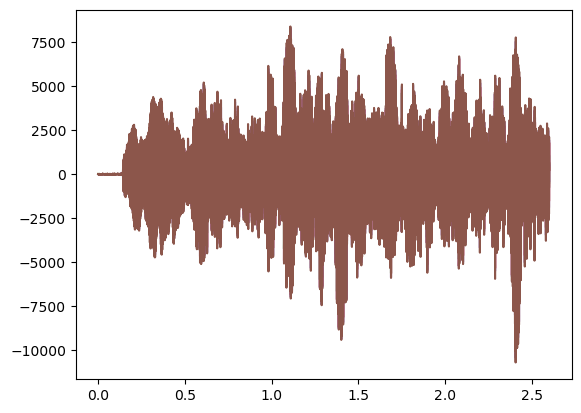

In [35]:
# poskusimo prebrati Bacha
file_paths = ["Bach.44100.txt", "Bach.11025.txt", "Bach.5512.txt","Bach.2756.txt","Bach.1378.txt","Bach.882.txt"][::-1]
frekvence = [44100, 11025, 5512, 2756, 1378, 882][::-1]
nus_s=[]
dfts = []
ts = []
Ns = []
for ind, file_path in enumerate(file_paths):
    y = []
    with open(file_path, "r") as file:
        for line in file:
            y.append(float(line.strip()))


    dt = 1/frekvence[ind]
    t = np.arange(0,len(y) * dt, dt)
    plt.plot(t,y)

    T = len(y) * dt
    N = len(y)
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    print("kritična: ",nu_c)
    print("min: ",nu_min)
    dft = 1/N * np.fft.fft(y)
    # dft = 1/N * DFT(y)
    dfts.append(np.roll(dft,N//2)[N//2:])
    ts.append(t)
    Ns.append(N)
    nus_s.append(nus[N//2:])



np.save("dfts_bach", dfts)
np.save("ts_bach", ts)
np.save("Ns_bach", Ns)
np.save('nus_s_bach', nus_s)
# plt.figure()
# plt.plot(nus, abs(np.roll(dft,N//2))**2)
# plt.xlim(-2000,2000)


# # poskusimo prebrati Bacha
# file_path = "Bach.882.txt"
# y = []
# with open(file_path, "r") as file:
#     for line in file:
#         y.append(float(line.strip()))

# plt.figure()
# # print(y)
# # dt = 1/44100
# dt = 1/882
# t = np.arange(0,len(y) * dt, dt)
# plt.plot(t,y)

# T = len(y) * dt
# N = len(y)
# t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
# print("kritična: ",nu_c)
# print("min: ",nu_min)

# plt.figure()
# # dft = 1/N * np.fft.fft(y)
# dft = 1/N * DFT(y)
# plt.plot(nus[N//2:], abs(np.roll(dft,N//2)[N//2:])**2)
# # plt.plot(nus[:], abs(np.roll(dft,N//2)[:])**2)
# print(abs(np.roll(dft,N//2)[N//2:]))
# plt.xlim(200,450)

[-1.92324466e-01  1.92324466e-01  5.76973397e-01 ...  4.39846053e+02
  4.40230702e+02  4.40615351e+02]
[-1.92296958e-01  1.92296958e-01  5.76890874e-01 ...  6.87846218e+02
  6.88230812e+02  6.88615406e+02]
[0.00000000e+00 3.84593916e-01 7.69187831e-01 ... 1.37684622e+03
 1.37723081e+03 1.37761541e+03]
[0.00000000e+00 3.84593916e-01 7.69187831e-01 ... 2.75484622e+03
 2.75523081e+03 2.75561541e+03]
[-1.92307692e-01  1.92307692e-01  5.76923077e-01 ...  5.51134615e+03
  5.51173077e+03  5.51211538e+03]
[0.00000000e+00 3.84615385e-01 7.69230769e-01 ... 2.20488462e+04
 2.20492308e+04 2.20496154e+04]


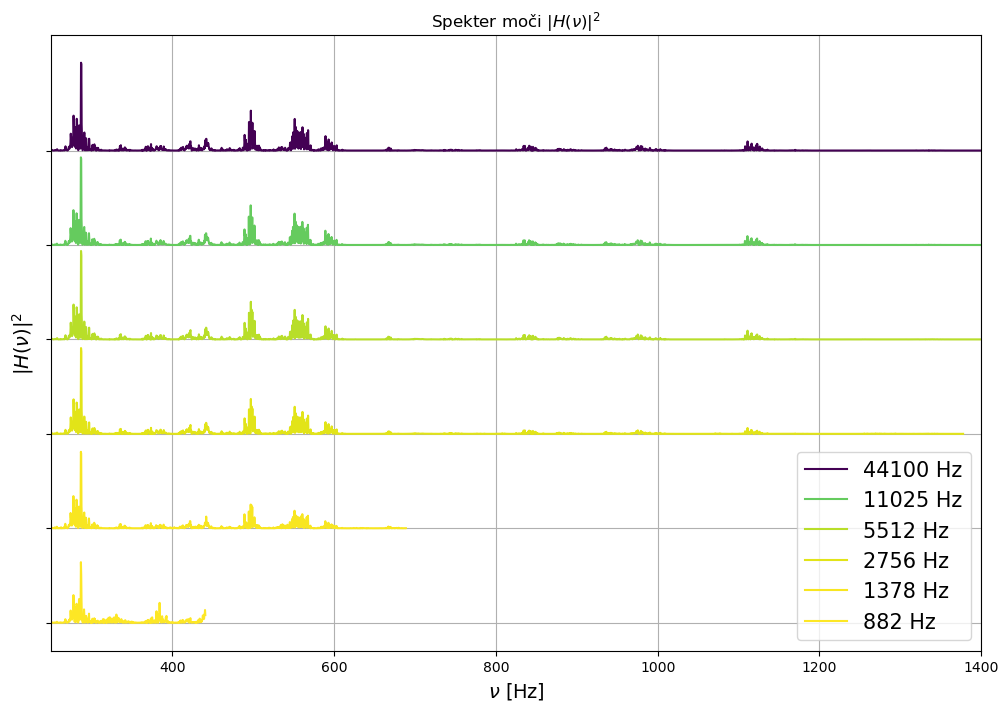

In [118]:
from matplotlib.colors import Normalize

frekvence = [44100, 11025, 5512, 2756, 1378, 882][::-1]
dfts = np.load('dfts_bach.npy',allow_pickle=True)
Ns = np.load('Ns_bach.npy',allow_pickle=True)
ts = np.load('ts_bach.npy',allow_pickle=True)
nus_s = np.load('nus_s_bach.npy',allow_pickle=True)


# alphas = [1,0.9,0.8,0.7,0.6,0.5]
cmap = plt.get_cmap('viridis_r')
norm = Normalize(vmin=min(frekvence), vmax=max(frekvence))
# norm_frekvence = [norm(f) for f in frekvence]


plt.figure(figsize=(12,8))

# all_maxi_f = []
# all_maxi_ampl = []
for ind, dft in enumerate(dfts):
    # maxi_f = []
    # maxi_ampl = []
    color=cmap(norm(frekvence[ind]))
    # plt.figure()
    print(nus_s[ind])
    # maxi_f.append(np.array(nus_s[ind])[np.where(abs(dft)**2 == max(abs(dft)**2))])
    # maxi_ampl.append((abs(dft)**2)[np.where(abs(dft)**2 == max(abs(dft)**2))])
    # plt.scatter(maxi_f, ind*55000 + np.array(maxi_ampl))
    plt.plot(nus_s[ind],ind*55000 + abs(dft)**2,color=color, label=f'{frekvence[ind]}'+' Hz')
    # all_maxi_f.append(maxi_f)
    # all_maxi_ampl.append(maxi_ampl)
plt.xlim(250,1400)

# plt.gca().secondary_yaxis('right').set_yticks(np.arange(0,6*55000, 55000),frekvence)
# plt.gca().secondary_yaxis('right').set_yticklabels(frekvence, color='r')
frekvence_t = ["" for f in frekvence]
plt.yticks(np.arange(0,6*55000, 55000), frekvence_t)
plt.ylabel(r"$|H(\nu)|^2$", fontsize=14)
plt.xlabel(r"$\nu$ [Hz]",fontsize=14)
plt.grid()
plt.legend(fontsize="15",reverse=True)
plt.title(r'Spekter moči $|H(\nu)|^2$')

plt.savefig('bach_1')

kritična:  441.0
min:  882.0


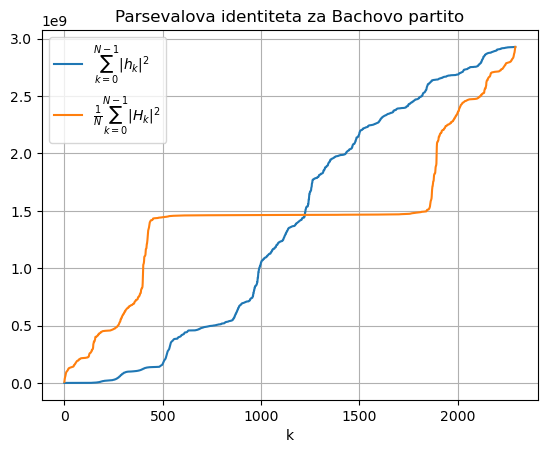

In [137]:

file_paths = ["Bach.44100.txt", "Bach.11025.txt", "Bach.5512.txt","Bach.2756.txt","Bach.1378.txt","Bach.882.txt"][::-1]
frekvence = [44100, 11025, 5512, 2756, 1378, 882][::-1]

file_path = "Bach.882.txt"
y=[]
with open(file_path, "r") as file:
    for line in file:
        y.append(float(line.strip()))


    dt = 1/882
    t = np.arange(0,len(y) * dt, dt)

    T = len(y) * dt
    N = len(y)
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    print("kritična: ",nu_c)
    print("min: ",nu_min)
    dft = 1/N * np.fft.fft(y)
    dft =  DFT(y,roll=True)

cumsumH = 1/N * np.cumsum(np.abs(dft)**2)
cumsumh = np.cumsum(np.array(y)**2)

plt.plot(np.arange(0,len(cumsumh),1),cumsumh,label=r'$\sum_{k=0}^{N-1} |h_k|^2$')
plt.plot(np.arange(0,len(cumsumh),1),cumsumH,label=r"$\frac{1}{N} \sum_{k=0}^{N-1} |H_k|^2$")
plt.xlabel('k')
plt.title('Parsevalova identiteta za Bachovo partito')
plt.legend()
plt.grid()
plt.savefig('parseval')


[array([286.75577846, 287.14042739])] [array([35261.37306634, 27984.41051583])]
[array([286.71476416, 287.09935808])] [array([44534.92396431, 43537.47247459])]
[array([286.90706112, 287.29165504])] [array([49955.03144531, 47863.37898724])]
[array([286.90706112, 287.29165504])] [array([51503.21128503, 48894.99680054])]
[array([286.73076923, 287.11538462])] [array([51017.51249947, 50126.62059453])]
[array([286.92307692, 287.30769231])] [array([51139.48257895, 50248.10109361])]


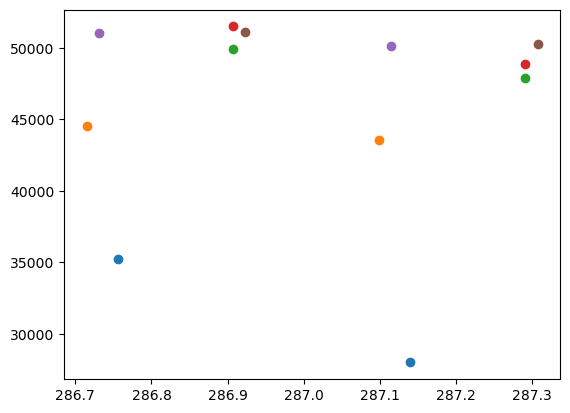

In [208]:
plt.figure()
for f,a in zip(all_maxi_ampl, all_maxi_f):
    print(a,f)
    plt.plot(a[0],f[0], linestyle='', marker='o')

In [119]:

# frekvence = [44100, 11025, 5512, 2756, 1378, 882][::-1]
# dfts = np.load('dfts_bach.npy',allow_pickle=True)
# Ns = np.load('Ns_bach.npy',allow_pickle=True)
# ts = np.load('ts_bach.npy',allow_pickle=True)
# nus_s = np.load('nus_s_bach.npy',allow_pickle=True)


# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')
# # alphas = [1,0.9,0.8,0.7,0.6,0.5]
# cmap = plt.get_cmap('copper_r')
# norm = Normalize(vmin=min(frekvence), vmax=max(frekvence))
# # norm_frekvence = [norm(f) for f in frekvence]

# plt.figure(figsize=(16,6))
# for ind, dft in enumerate(dfts):
#     # color=cmap(norm(frekvence[ind]))
#     # plt.figure()
#     f = ind * np.ones(np.shape(dft))
#     print(ind)
#     if ind == 0:
#         ax.plot(nus_s[ind][:3000],f[:3000], abs(dft)**2)# color=color)
#     else:
#         ax.plot(nus_s[ind],f, abs(dft)**2)# color=color)
# plt.xlim(0,2000)

# # plt.gca().secondary_yaxis('right').set_yticks(np.arange(0,6*55000, 55000),frekvence)
# # plt.gca().secondary_yaxis('right').set_yticklabels(frekvence, color='r')
# # frekvence_t = [str(f)+" Hz" for f in frekvence]
# print(np.arange(0,6*ind, ind))
# ax.set_yticks(np.arange(0,6, 1), frekvence)
# ax.set_ylabel("Frekvenca vzorčenja [Hz]")
# ax.set_xlabel(r"$\nu$ [Hz]")
# ax.set_zlabel(r"$|H(\nu)|^2$")
# ax.set_xlim(250,6000)
# # ax.grid()
# ax.legend()
# ax.set_title(r'Spekter moči $|H(\nu)|^2$')



23040.0
kritična:  22050.0
min:  44100.0
-24644.0
53216
53216
[-24644.0, 1.0, -406.0, -348.0, -407.0, -347.0, -331.0, -333.0, -335.0, -347.0, -255.0, -343.0, -336.0, -286.0, -287.0, -392.0, -313.0, -349.0, -416.0, -378.0, -412.0, -392.0, -319.0, -317.0, -311.0, -325.0, -317.0, -284.0, -346.0, -357.0, -317.0, -287.0, -310.0, -329.0, -372.0, -411.0, -412.0, -401.0, -386.0, -306.0, -309.0, -304.0, -338.0, -362.0, -404.0, -345.0, -414.0, -363.0, -374.0, -377.0, -387.0, -335.0, -381.0, -373.0, -406.0, -438.0, -429.0, -361.0, -302.0, -369.0, -340.0, -401.0, -356.0, -445.0, -444.0, -313.0, -325.0, -351.0, -319.0, -393.0, -342.0, -394.0, -387.0, -407.0, -387.0, -329.0, -326.0, -313.0, -339.0, -392.0, -394.0, -432.0, -451.0, -334.0, -364.0, -314.0, -290.0, -300.0, -405.0, -343.0, -404.0, -382.0, -284.0, -342.0, -397.0, -336.0, -349.0, -407.0, -448.0, -425.0, -366.0, -297.0, -316.0, -326.0, -322.0, -283.0, -365.0, -373.0, -388.0, -375.0, -303.0, -326.0, -313.0, -326.0, -296.0, -314.0, -371.0, -3

/Users/lukapuslar/miniconda3/envs/torch_m1/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


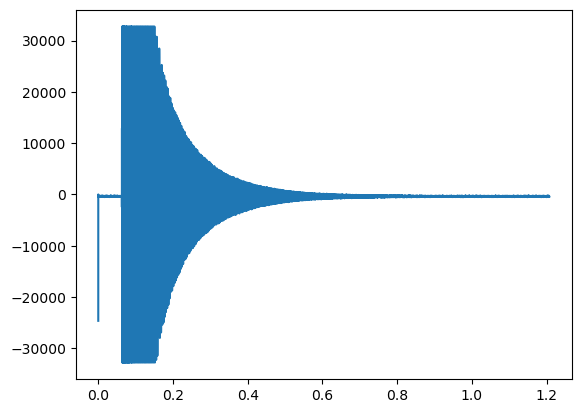

In [86]:
#akustični resonator:
# poskusimo prebrati Bacha
file_paths = ["/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus1_akres_novi.dat", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus2_akres_novi.dat", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus4_akres_novi.dat"]
file_paths = ["/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus1_akres_novi.dat", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus1_akres.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus2_akres_novi.dat","/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus2_akres.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus3_akres_novi.dat","/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus3_akres.txt","/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus4_akres_novi.dat"]
file_paths = ["/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus1_akres.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus2_akres.txt", "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/poskus3_akres.txt"]


frekvence = np.ones(np.shape(file_paths)) * 44100
nus_s=[]
dfts = []
ts = []
Ns = []
for ind, file_path in enumerate(file_paths):
    y = []
    with open(file_path, "r") as file:
        for line in file:
            y.append(float(line.strip()))
        print(y[0])


    dt = 1/frekvence[ind]
    t = np.arange(0,len(y) * dt, dt)
    if len(t) != len(y):
        print(len(y))
        t=np.arange(0,(len(y)-1) * dt, dt)
        print(len(t))
        print(y)
        plt.plot(t,y)
    # else:
        # plt.plot(t,y)


    T = len(y) * dt
    N = len(y)
    t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)
    print("kritična: ",nu_c)
    print("min: ",nu_min)
    dft = 1/N * np.fft.fft(y)
    # dft = 1/N * DFT(y)
    dfts.append(np.roll(dft,N//2)[N//2:])
    ts.append(t)
    Ns.append(N)
    nus_s.append(nus[N//2:])



np.save("dfts_ak", dfts)
np.save("ts_ak", ts)
np.save("Ns_ak", Ns)
np.save('nus_s_ak', nus_s)

[0.00000000e+00 9.95710093e-01 1.99142019e+00 ... 2.20470129e+04
 2.20480086e+04 2.20490043e+04]
0 [ 305.68299842  304.68728833  303.69157823  306.67870851  774.66245202
  773.66674193  772.67103184  775.65816211  302.69586814  771.67532174
  776.65387221  770.67961165  301.70015805  777.6495823   769.68390156
  307.6744186   778.64529239  768.68819147  300.70444796  767.69248137
  779.64100248  299.70873786  766.69677128  308.6701287     0.
 1280.48317905 1281.47888914 1279.48746895 1282.47459923 1278.49175886]
[0.00000000e+00 8.28698136e-01 1.65739627e+00 ... 2.20475139e+04
 2.20483426e+04 2.20491713e+04]
1 [304.96091401 305.78961215 304.13221587 303.30351774 306.61831028
 302.4748196  307.44700842 301.64612147 300.81742333 308.27570655
 299.9887252  309.10440469 299.16002706 298.33132892 309.93310283
   0.         297.50263079 310.76180096 296.67393265 311.5904991
 295.84523452 295.01653638 605.77833734 604.94963921 606.60703548
 604.12094107 312.41919723 607.43573361 603.29224293 2

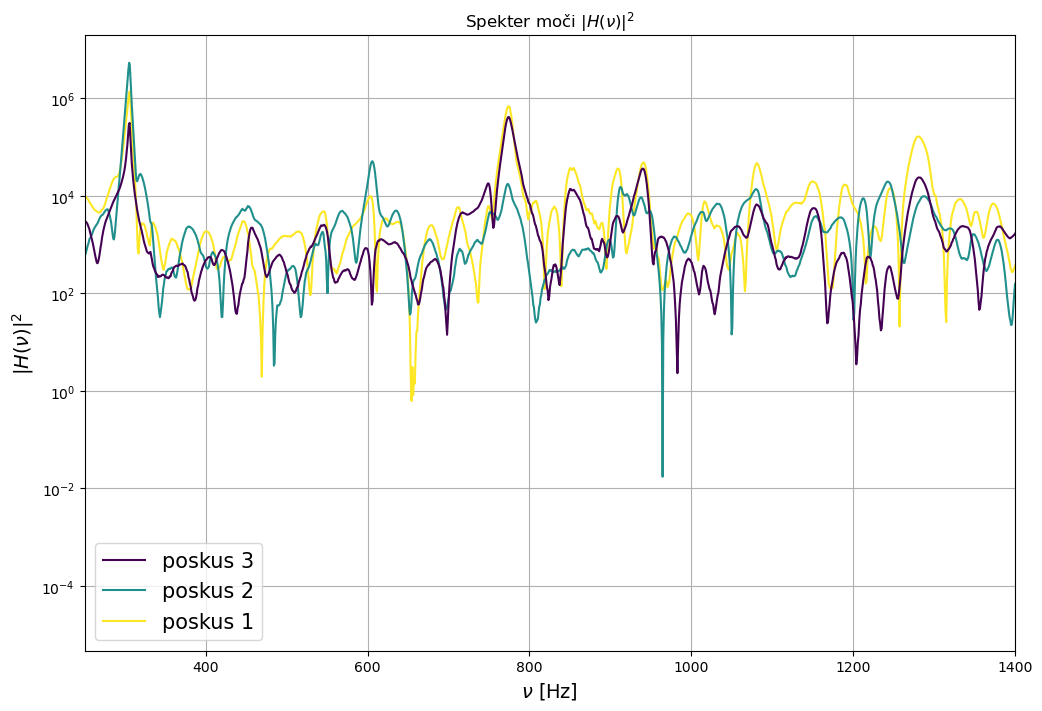

In [95]:
frekvence = np.ones(np.shape(file_paths)) * 44100
dfts = np.load('dfts_ak.npy',allow_pickle=True)
Ns = np.load('Ns_ak.npy',allow_pickle=True)
ts = np.load('ts_ak.npy',allow_pickle=True)
nus_s = np.load('nus_s_ak.npy',allow_pickle=True)


# alphas = [1,0.9,0.8,0.7,0.6,0.5]
cmap = plt.get_cmap('viridis_r')
# norm = Normalize(vmin=min(frekvence), vmax=max(frekvence))
# norm_frekvence = [norm(f) for f in frekvence]


plt.figure(figsize=(12,8))

# all_maxi_f = []
# all_maxi_ampl = []
for ind, dft in enumerate(dfts):
    # maxi_f = []
    # maxi_ampl = []
    color=cmap(np.linspace(0,1,len(dfts))[ind])
    # plt.figure()
    print(nus_s[ind])
    # maxi_f.append(np.array(nus_s[ind])[np.where(abs(dft)**2 == max(abs(dft)**2))])
    # maxi_ampl.append((abs(dft)**2)[np.where(abs(dft)**2 == max(abs(dft)**2))])
    # plt.scatter(maxi_f, ind*55000 + np.array(maxi_ampl))
    indices = np.argsort(abs(dft)**2)[::-1]
    print(ind, nus_s[ind][indices][:30])
    plt.plot(nus_s[ind],abs(dft)**2,color=color, label=f'poskus {ind+1}')
    # all_maxi_f.append(maxi_f)
    # all_maxi_ampl.append(maxi_ampl)
plt.xlim(250,1400)

# plt.gca().secondary_yaxis('right').set_yticks(np.arange(0,6*55000, 55000),frekvence)
# plt.gca().secondary_yaxis('right').set_yticklabels(frekvence, color='r')
frekvence_t = ["" for f in frekvence]
# plt.yticks(np.arange(0,6*, 55000), frekvence_t)
plt.ylabel(r"$|H(\nu)|^2$", fontsize=14)
plt.xlabel(r"$\nu$ [Hz]",fontsize=14)
plt.yscale('log')
plt.grid()
plt.legend(fontsize="15",reverse=True)
plt.title(r'Spekter moči $|H(\nu)|^2$')

plt.savefig('ak_1')

no res
['1', '1', '3', '2', '0', '0', '0', '1', '2', '4', '2', '0', '1', '2', '0', '2', '1', '2', '0', '1', '2', '3', '3', '2', '2', '0', '1', '2', '1', '2', '0', '0', '0', '2', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '2', '3', '2', '0', '0', '0', '0', '1', '0', '0', '1', '3', '2', '0', '1', '1', '1', '3', '2', '1', '3', '1', '3', '1', '0', '0', '3', '1', '4', '7', '1', '3', '1', '1', '3', '4', '1', '2', '2', '3', '3', '1', '0', '2', '3', '1', '2', '2', '5', '1', '0', '1', '2', '2', '1', '2', '1', '2', '0', '3', '4', '3', '1', '2', '2', '1', '1', '6', '3', '2', '2', '1', '1', '0', '2', '3', '0', '1', '2', '3', '0', '6', '3', '1', '4', '3', '0', '0', '4', '3', '3', '4', '2', '2', '0', '4', '3', '1', '0', '1', '3', '1', '1', '1', '4', '1', '0', '3', '0', '2', '1', '2', '1', '2', '1', '1', '0', '1', '2', '0', '2', '2', '2', '2', '4', '0', '1', '0', '1', '1', '2', '2', '2', '0', '0', '2', '1', '1', '0', '2', '1', '3', '2', '5', '0', '1', '7', '2', '2', '4', '1', '1', '4

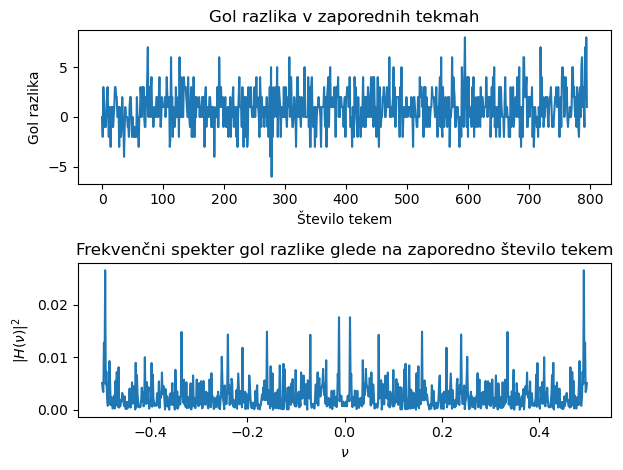

In [153]:
from datetime import datetime

file_path= "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/chelsea_22_23.txt"
file_path= "/Users/lukapuslar/Desktop/school/3_letnik/Mafi_prak/4_naloga_DFT/chelsea.txt"
y = []
goals = []
days = []
goal_d = []
with open(file_path, "r") as file:

    for ind,line in enumerate(file):
        if line != '\n' and line != '':
            try:
                info = line.strip()
                parts= info.split('\t')
                date_str= parts[0]
                teams= parts[1]
                outcome= parts[2]
                res=parts[3]
                league= parts[4]
                

                # Create a datetime object from the date string
                date = datetime.strptime(date_str, '%d %b %Y')

                # Define the reference date (January 1, 2020)
                reference_date = datetime(2015, 1, 1)

                # Calculate the difference in days
                days_difference = (date - reference_date).days


                if "Chelsea" in teams.split('v')[0]:
                    try:
                        goals.append(res[0])
                        days.append(days_difference)
                        goal_d.append(float(res[0])-float(res[2]))
                    except:
                        print('no res')
                else:
                    # print(goals)
                    goals.append(res[2])
                    days.append(days_difference)
                    goal_d.append(float(res[2])-float(res[0]))
                
            except:
                continue
            # print(parts, date, teams, res, league)

            # goals.append()

print(goals)
print(days)
print(goal_d)


sort_indices = np.argsort(days)
goals = np.array(goals)[sort_indices]
days = np.array(days)[sort_indices]
matches = np.arange(0,len(days),1)
plt.subplot(2,1,1)
plt.plot(matches, goal_d)
plt.title('Gol razlika v zaporednih tekmah')
plt.xlabel('Število tekem')
plt.ylabel('Gol razlika')
y=goal_d
y=goals

dt = 1
T = len(y) * dt
N = len(y)
t,nus, nu_c, nu_min, dt = vzorec_prep(T, N)

plt.subplot(2,1,2)
dft = 1/N * np.fft.fft(y)[1:]
indices=np.argsort(abs(dft)**2)
print(np.array(nus[1:])[indices][::-1])
print(np.array(nus[1:])[indices][::-1])
plt.plot(nus[1:], abs(dft)**2)
plt.title('Frekvenčni spekter gol razlike glede na zaporedno število tekem')
plt.xlabel(r'$\nu$')
plt.ylabel(r"$|H(\nu)|^2$")
# plt.plot(nus[1:], np.real(dft))
plt.tight_layout()
plt.savefig("chelsea_2")
#upam da moj poskus šteje k dodatni točki, drugače bom pa vsaj stavni mojster